# Introducción y Descripción del Problema

El presente trabajo tiene como objetivo principal la aplicación de un flujo de trabajo completo de un proyecto de *Machine Learning*. En este caso, se aborda un **problema de regresión supervisada** orientado a la predicción de ventas en tiendas.

El dataset utilizado corresponde al conjunto de datos **Big Mart Sales Prediction**, disponible públicamente en [Kaggle](https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets/data). Este dataset se comprende de observaciones de ventas de ciertos productos (*items*) en determinados locales (*outlets*).

El propósito principal del trabajo es **desarrollar un modelo predictivo capaz de estimar las ventas esperadas** en función de los atributos del producto y del establecimiento. Para ello, se aplicará el flujo de trabajo completo de *Machine Learning*, incluyendo:

- Exploración y análisis descriptivo del conjunto de datos.  
- Limpieza, preprocesamiento y transformación de variables.  
- Entrenamiento y optimización de modelos de regresión.  
- Evaluación del rendimiento mediante métricas adecuadas.  
- Interpretación y conclusiones de los resultados obtenidos.

# Importación de Librerías y Configuración Inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from prince import MCA
import statsmodels.api as sm
import copy


# Carga y Exploración Inicial de los Datos


In [2]:
train = pd.read_csv("Train_BigMart.csv")
test = pd.read_csv("Test_BigMart.csv")

## Descripción general

Las columnas del Dataset que asociadas a los productos son las siguientes:

- **Item_Identifier**: nombre o identificador del producto

- **Item_Weight**: peso del producto en gramos

- **Item_Fat_Content**: clasificación del producto en términos de grasas contenidas en él.

- **Item_Visibility**: scoring de visibilidad del producto: medida que hace referencia al
conocimiento del producto en el consumidor. ¿Qué tan fácil puede ser encontrado el
producto?

- **Item_Type**: tipo de producto

- **Item_MRP**: máximum retailed price. Precio calculado por el fabricante que indica el
precio más alto que se puede cobrar por el producto.

Las columnas del Dataset que ascociadas a los locales son:

- **Outlet_Identifier**: identificador de la tienda

- **Outlet_Establishment_Year**: año de lanzamiento de la tienda

- **Outlet_Size**: tamaño de la tienda

- **Outlet_Location_Type**: clasificación de las tiendas según ubicación

- **Outlet_Type**: tipo de tienda

- **Item_Outlet_Sales**: ventas del producto en cada observacion

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train.info()

print(f"Cantidad de filas: {train.shape[0]}")
print(f"Cantidad de columnas: {train.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
Cantidad de filas: 8523
Cantidad de columnas:

# Análisis Exploratorio de Datos (EDA)

Vamos a visualizar los siguientes comportamientos del conjunto de datos:

- La distribución general de la variable objetivo `Item_Outlet_Sales`.  
- La relación entre variables numéricas y la variable objetivo.  
- La influencia de las variables categóricas sobre las ventas.  
- Posibles correlaciones entre variables predictoras.

Estas representaciones permiten detectar comportamientos, relaciones no lineales y variables potencialmente relevantes para el modelado.

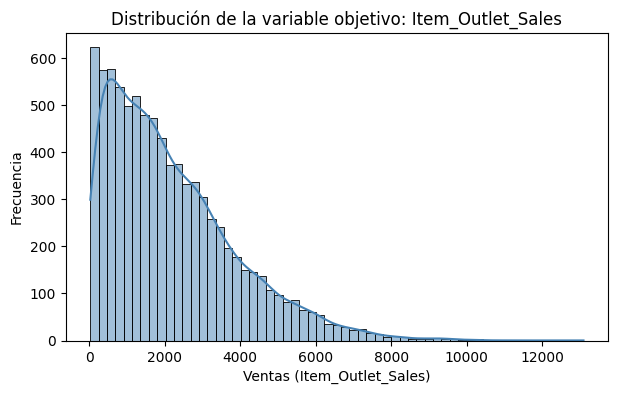

In [6]:
# Distribucion de la variable objetivo
plt.figure(figsize=(7,4))
sns.histplot(train['Item_Outlet_Sales'], kde=True, color='steelblue')
plt.title("Distribución de la variable objetivo: Item_Outlet_Sales")
plt.xlabel("Ventas (Item_Outlet_Sales)")
plt.ylabel("Frecuencia")
plt.show()


El gráfico muestra la distribución de la variable objetivo `Item_Outlet_Sales`, que representa las ventas individuales de los productos en los distintas tiendas.

Se puede observar una **distribución asimétrica hacia la derecha (sesgo positivo)**. Este patrón es típico en contextos de ventas donde una gran cantidad de artículos tienen baja rotación, y un grupo reducido genera la mayor parte de las ventas (*Ley 80-20 de Pareto*).  

Proximos pasos: 
- La distribución **NO** es normal, por lo tanto en los proximos pasos podriamos aplciar algunta transformación matematica para acercarla a una distribucion normal.

## Análisis de Variables Numéricas

En esta sección se analizan las variables **continuas** del conjunto de datos:  
`Item_Weight`, `Item_Visibility`, `Item_MRP` y `Item_Outlet_Sales`.

El objetivo es comprender su distribución y detectar posibles **sesgos**, **valores atípicos (outliers)** o **anomalías** que puedan afectar el rendimiento de los modelos predictivos. Idealmente, se busca que las distribuciones sean lo más parecido posible a una **distribución normal**, lo cual facilita el aprendizaje de la mayoria de los algoritmos.

Para ello, se realizarán visualizaciones que permitan observar la forma de las distribuciones y cuantificar posibles desviaciones o concentraciones extremas de valores.

In [7]:
columnas_numericas = train.select_dtypes(include=['float64']).columns
columnas_numericas

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

[Text(1, 0, 'Item_Weight'),
 Text(2, 0, 'Item_Visibility'),
 Text(3, 0, 'Item_MRP'),
 Text(4, 0, 'Item_Outlet_Sales')]

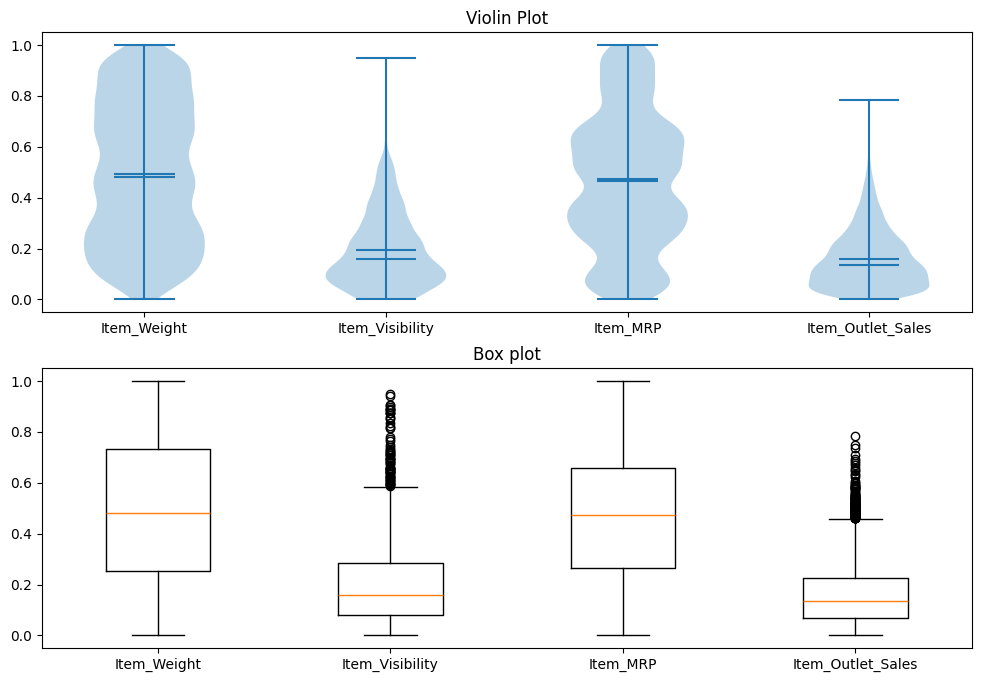

In [8]:

columnas_numericas = train.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
train_to_plot = scaler.fit_transform(train.loc[:, columnas_numericas])
train_to_plot = pd.DataFrame(data=train_to_plot, columns = columnas_numericas)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot.dropna().astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_numericas) + 1))
axs[0].set_xticklabels(columnas_numericas)

# plot box plot
axs[1].boxplot(train_to_plot.dropna().astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_numericas)
axs[1].set_xticks(range(1, len(columnas_numericas) + 1))
axs[1].set_xticklabels(columnas_numericas)

Las visualizaciones indican que:
 - Las variables númericas no siguen una distribución normal por lo que en los proximos pasos tendremos que aplicar transforamciones para acercarlas lo mas posible.
 - Existen valores atipicos (outliers) en `Item_Visibility` y `Item_Outlet_Sales`.


## Análisis de Variables Categóricas

Las siguientes variables del conjunto de datos son **categóricas**:

`Item_Identifier`, `Item_Fat_Content`, `Item_Type`, `Outlet_Identifier`, `Outlet_Establishment_Year`, `Outlet_Size`, `Outlet_Location_Type`, `Outlet_Type`

El objetivo de este análisis es comprender la distribución de las variables categoricas, encontrar inconsistencias y determinar si se van a requerir transformaciones para que se puedan utilizar en el modelo de datos.

A continuación, se examina cada una de ellas con especial atención en su relación con la variable objetivo (`Item_Outlet_Sales`), para evaluar su relevancia predictiva.

### Item_Fat_Content

Esta variable representa el **contenido de grasa del producto**, y en principio podría ser una variable *categórica ordinal*.

In [9]:
train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

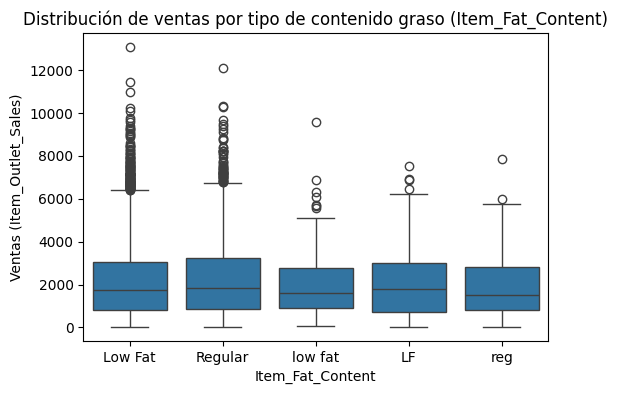

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train)
plt.title("Distribución de ventas por tipo de contenido graso (Item_Fat_Content)")
plt.xlabel("Item_Fat_Content")
plt.ylabel("Ventas (Item_Outlet_Sales)")
plt.show()


Sin embargo, al analizar las distribuciones de la variable objetivo (`Item_Outlet_Sales`) según las categorías de `Item_Fat_Content`, se observa que las diferencias entre los grupos son mínimas. Por este motivo, asumimos que sea NO ordinal y que debemos aplicarla **one-hot-encoding** en los pr´oximos pasos.
  
Además, en el grafico vemos **inconsistencias en su codificación**, la misma categoría pareceria estar escrita de distintas formas (`'Low Fat'`, `'LF'`, `'low fat'`, `'Regular'`, `'reg'`).  

Por lo tanto, unificamos las etiquetas para que tomen los siguietnes valores:

- **0** → Low Fat (y sus variantes)  
- **1** → Regular (y sus variantes)

In [11]:
train.loc[train.Item_Fat_Content.isin(['Low Fat', 'LF', 'low fat']), 'Item_Fat_Content'] = 0
train.loc[train.Item_Fat_Content.isin(['Regular', 'reg']), 'Item_Fat_Content'] = 1

In [12]:
train.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300                0         0.016047   
1              DRC01        5.920                1         0.019278   
2              FDN15       17.500                0         0.016760   
3              FDX07       19.200                1         0.000000   
4              NCD19        8.930                0         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865                0         0.056783   
8519           FDS36        8.380                1         0.046982   
8520           NCJ29       10.600                0         0.035186   
8521           FDN46        7.210                1         0.145221   
8522           DRG01       14.800                0         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   

### Item_Type

La variable `Item_Type` indica el **tipo o categoría del producto** (por ejemplo: Meat, Breads, Soft Drinks, etc.).  

Hay **16 categorías distintas**, cada una correspondiente a un tipo de producto comercializado por la cadena.

Se trata de una **variable categórica no ordinal**.

Al igual que la anterior esta variable se incluirá posteriormente en el proceso de **OHE**, con el objetivo de representar cada tipo de producto como variables binarias y que el modelo pueda interpretarlas correctamente.


In [13]:
train.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

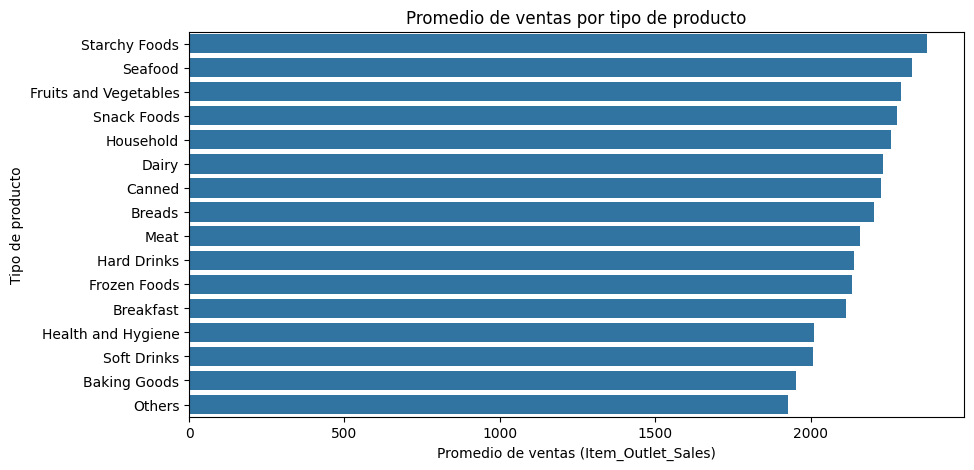

In [14]:
avg_sales = train.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_sales.values, y=avg_sales.index)
plt.title("Promedio de ventas por tipo de producto")
plt.xlabel("Promedio de ventas (Item_Outlet_Sales)")
plt.ylabel("Tipo de producto")
plt.show()


### Conclusión:
- No parece haber una relacion clara entre los tipos de producto y su venta.



### Outlet_Location_Type

La variable `Outlet_Location_Type` representa el **tipo de ubicación geográfica** donde se encuentra cada punto de venta.  
Incluye **3 categorías** que diferencian el tamaño o tipo de la zona (por ejemplo: *Tier 1*, *Tier 2* y *Tier 3*).

Se trata de una **variable categórica no ordinal**.

Se aplicará una **codificación One-Hot (One-Hot Encoding)**, que generará variables binarias representando cada categoría.


In [15]:
train.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

### Outlet_Type

Variable categorica NO Ordinal.

Tambien se aplica OHE en los proximos pasos.

In [16]:
train.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

### Outlet_Establishment_Year

Variable categorica NO Ordinal.

Tambien se aplica OHE en los proximos pasos.

In [17]:
train.Outlet_Establishment_Year.value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

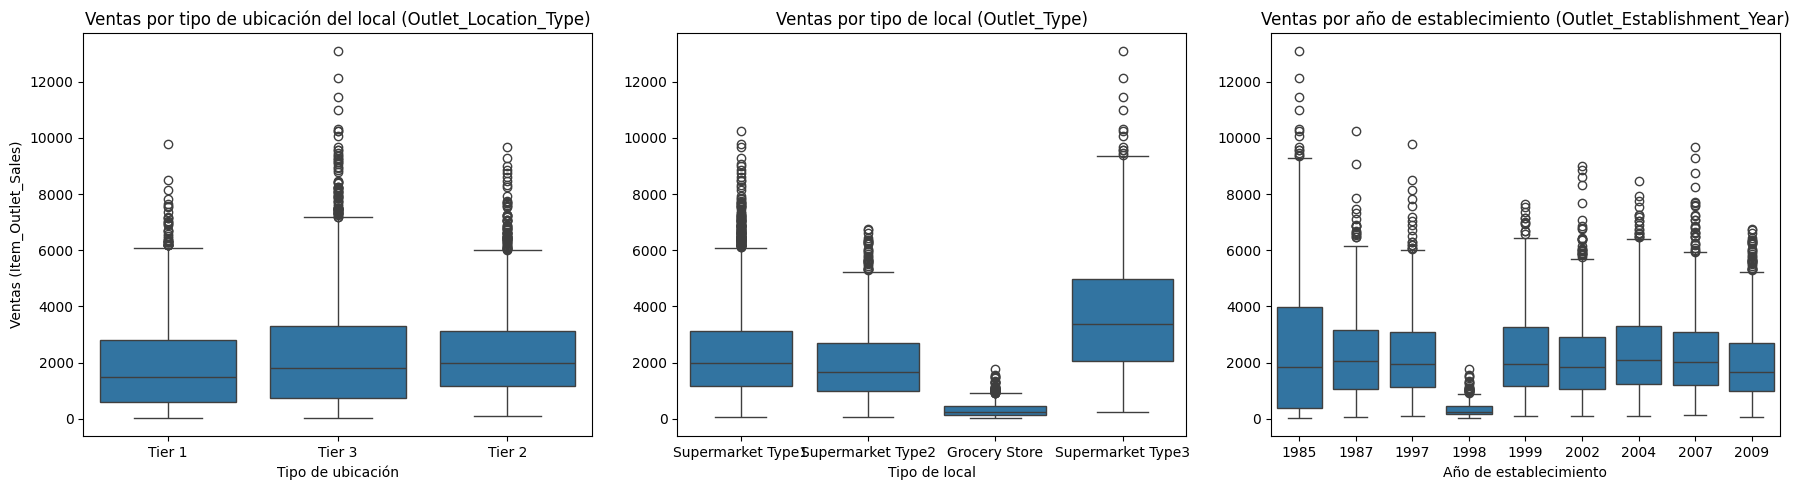

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train, ax=axes[0])
axes[0].set_title("Ventas por tipo de ubicación del local (Outlet_Location_Type)")
axes[0].set_xlabel("Tipo de ubicación")
axes[0].set_ylabel("Ventas (Item_Outlet_Sales)")

sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train, ax=axes[1])
axes[1].set_title("Ventas por tipo de local (Outlet_Type)")
axes[1].set_xlabel("Tipo de local")
axes[1].set_ylabel("")

sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train, ax=axes[2])
axes[2].set_title("Ventas por año de establecimiento (Outlet_Establishment_Year)")
axes[2].set_xlabel("Año de establecimiento")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


### Conclusiones:
- El grafico de `Outlet_Location_Type` pareciera indicar que las locales que estan en el Tier 3 venden mas, por lo tanto podriamos asumir que son puede ser las locaciones mas exclusivas o bien centros urbanos mas grandes.
- Similar al caso anterior sucede para `Outlet_Type`. Esto podria indicar que estas tiendas son las mas grandes.
- No se observa una tendencia temporal muy clara. Las ventas son parejas excepto en el año 1998. Analizaremos esto mas adelante.

## Analisis de Datos faltantes

<Figure size 1200x600 with 0 Axes>

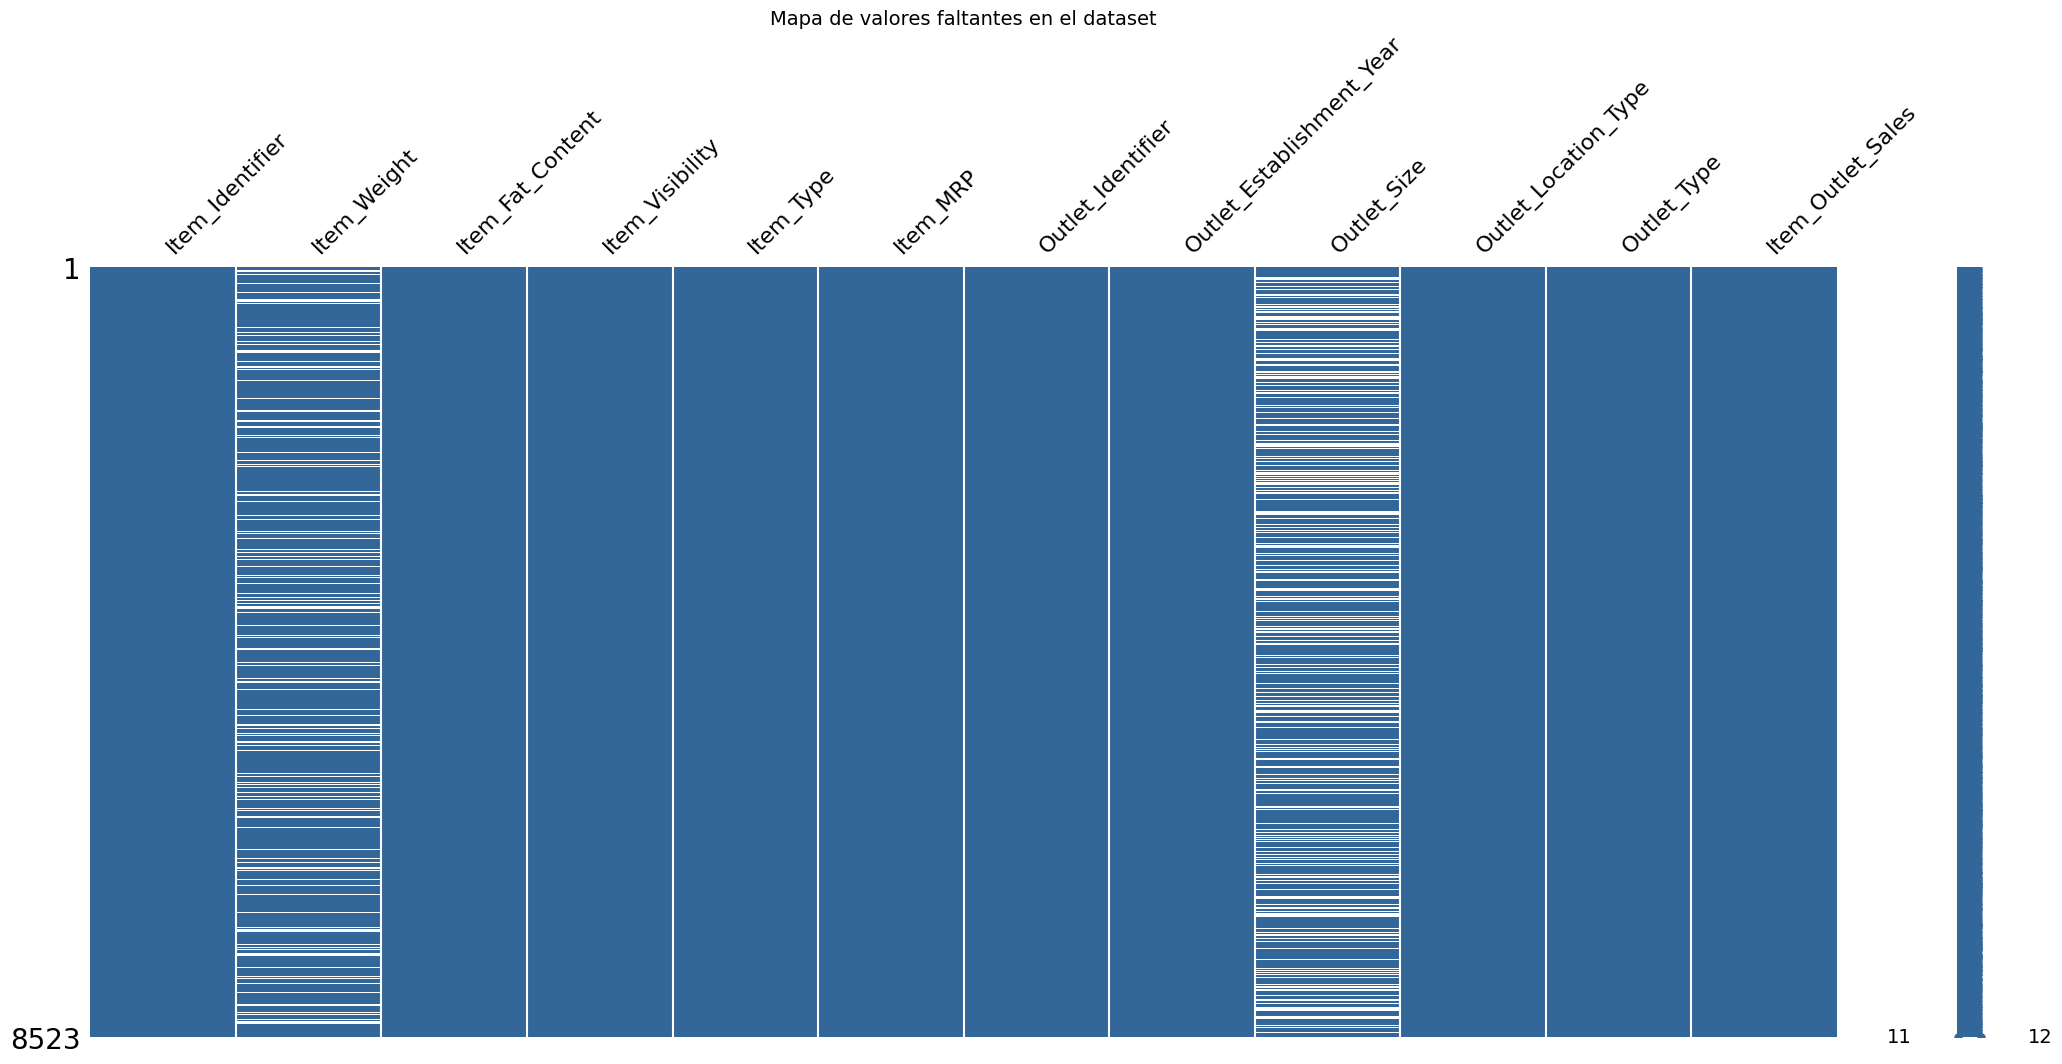

Resumen de columnas con valores faltantes:


,Valores Nulos,Porcentaje
Outlet_Size,2410,28.28
Item_Weight,1463,17.17


In [19]:
# Gráfico tipo "matrix" de valores faltantes
plt.figure(figsize=(12,6))
msno.matrix(train, color=(0.2, 0.4, 0.6))
plt.title("Mapa de valores faltantes en el dataset", fontsize=14)
plt.show()

# Tabla resumen de valores faltantes
missing_table = (
    train.isnull()
         .sum()
         .to_frame(name='Valores Nulos')
         .assign(Porcentaje=lambda df: (df['Valores Nulos'] / len(train) * 100).round(2))
         .query('`Valores Nulos` > 0')  # solo columnas con nulos
         .sort_values(by='Porcentaje', ascending=False)
)

print("Resumen de columnas con valores faltantes:")
display(missing_table)

### Conclusiones
Claramente vemos como las columnas `Outlet_Size` y `Item_Weight` son las unicas columnas que tienen nulos. 

Mas adelante realizaremos una inferencia sobre estos datos para disminuir sus faltantes.

# Preprocesamiento y Preparación de Datos

## Imputación de datos faltantes

In [20]:
cantidad_de_productos = len(train.Item_Identifier.unique())
print("En", len(train), "observaciones hay solamente", cantidad_de_productos, "productos distintos. Por lo que muchos se repiten.")

En 8523 observaciones hay solamente 1559 productos distintos. Por lo que muchos se repiten.


In [21]:
train.loc[train['Item_Identifier'] == 'FDP10', ['Item_Identifier', 'Item_Weight']]


,Item_Identifier,Item_Weight
7,FDP10,NaN
585,FDP10,19.0
2623,FDP10,19.0
3382,FDP10,19.0
4585,FDP10,19.0
6087,FDP10,19.0
7883,FDP10,19.0


Como hay mas observaciones que productos, analizamos la posibilidad de completar aquellas celdas que esten marcadas como NaN segun el mismo identificador de producto.
En este caso asumimos que el peso del producto no deberia cambiar para un mismo identificador de producto. Lo mismo ocurre con el tamano de la tienda y el identificador de la tienda.

In [22]:
# Tomo indices de las filas que tienen NA en el Item_Weight
indices_filas_NA_weight = train.loc[train.loc[:,'Item_Weight'].isna()].index

# Asignamos los valores del identificador que tiene ese indice
identificador_item_NA_weight = train.loc[indices_filas_NA_weight, 'Item_Identifier']

# Dentro de los valores NA, cuantos repeticiones encontramos?
print(len(identificador_item_NA_weight) - len(identificador_item_NA_weight.unique()))
# Como hay repetidos, me quedo solamente con los unicos
identificador_item_NA_weight = identificador_item_NA_weight.unique()
# Solo para asegurarme que tiene sentido esta teoria, comrpuebo con un valor que tiene NA: FDP10
train.loc[train['Item_Identifier'] == 'FDP10', ['Item_Identifier', 'Item_Weight']]
# Vemos que efectivamente todos sus weights son iguales. Tiene sentido cambiarlo.

# Creamos diccionario que tenga por cada identificador, su weight
item_weight = {}
for identificador in identificador_item_NA_weight:
  # Creamos un nuevo DF solo con el identificador de interes
  identificador_con_NA = train.loc[train['Item_Identifier'] == identificador, ['Item_Identifier', 'Item_Weight']]

  # Si hay mas de un valor ademas del NAN tenemos que buscar el que mas se repita para asignarlo
  if (len(identificador_con_NA.groupby('Item_Weight')) > 1):
    # Por las dudas tengamos 3 valores distintos, incluyendo el NA, uso dropna() antes de agrupar
    contador_por_grupo = pd.DataFrame({'Weight': identificador_con_NA['Item_Weight'].dropna().unique(),
                                       'Conteo' : identificador_con_NA.dropna().groupby('Item_Weight').size()})
    weight_mas_repetido = contador_por_grupo.loc[contador_por_grupo['Conteo'] == contador_por_grupo['Conteo'].max()]

    # Si aun asi siguen habiendo mas de un peso repetido en la misma cantidad de veces hacemos la media entre ellos
    if len(weight_mas_repetido) > 1:
      weight_reemplazo = weight_mas_repetido['Weight'].mean()
    else:
      weight_reemplazo = weight_mas_repetido['Weight']

  # 2 posibilidades: No hay mas de 2 weights para el producto. No hay otro producto sin NAN en su weight
  else:
    if len(identificador_con_NA['Item_Weight'].unique()) == 1:
      # Por ahora asignamos valor 0. Luego lo resolveremos
      weight_reemplazo = np.array([0])
    else:
      # En caso de que no hayan varios valores de weight para un mismo producto (seria lo logico), se resuelve facil:
      weight_reemplazo = identificador_con_NA['Item_Weight'].dropna().unique()

  item_weight[identificador] = weight_reemplazo.item()

321


In [23]:
# Ahora que tenemos el diccionario que contiene KEY=Identificador ITEM=Weight, podemos reemplazar los valores NAN del Weight
for indice in indices_filas_NA_weight:
  train.loc[indice, 'Item_Weight'] = item_weight[train.loc[indice, 'Item_Identifier']]

In [24]:
## Verificamos que ya no haya mas valores NA en Item_Weight
train['Item_Weight'].isna().sum()


np.int64(0)

Ahora vamos con el tratamiento de los nulos de `Outlet_Size`. En este caso la relación no es tan directa como en el caso anterior, ya que varios locales del mismo tipo (`Outlet_Type`) pueden tener distinto tamaño (`Outlet_Size`).

Se genera una **tabla cruzada** para observar la distribución del tamaño de los locales según el año en que fueron establecidos. Normalizamos los valores para simplificar.
Esto nos va a permitir ver si los locales más antiguos tienden a ser más grandes o si existe un patrón en los años de apertura.

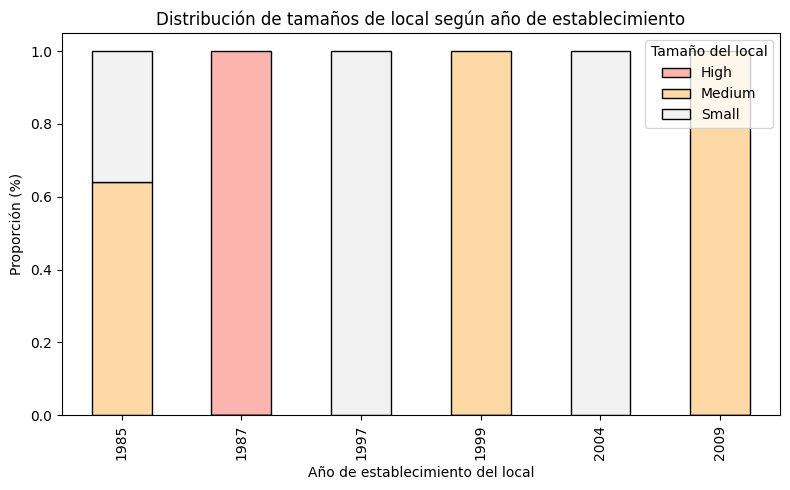

In [25]:
# Creamos la tabla cruzada normalizada
cross_year = pd.crosstab(
    index=train['Outlet_Establishment_Year'],
    columns=train['Outlet_Size']
).apply(lambda r: r/r.sum(), axis=1)

cross_year.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='Pastel1',
    edgecolor='black'
)

plt.title("Distribución de tamaños de local según año de establecimiento")
plt.xlabel("Año de establecimiento del local")
plt.ylabel("Proporción (%)")
plt.legend(title="Tamaño del local")
plt.tight_layout()
plt.show()


In [26]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

Hacemos lo mismo entre `Outlet_Location_Type` y `Outlet_Size`

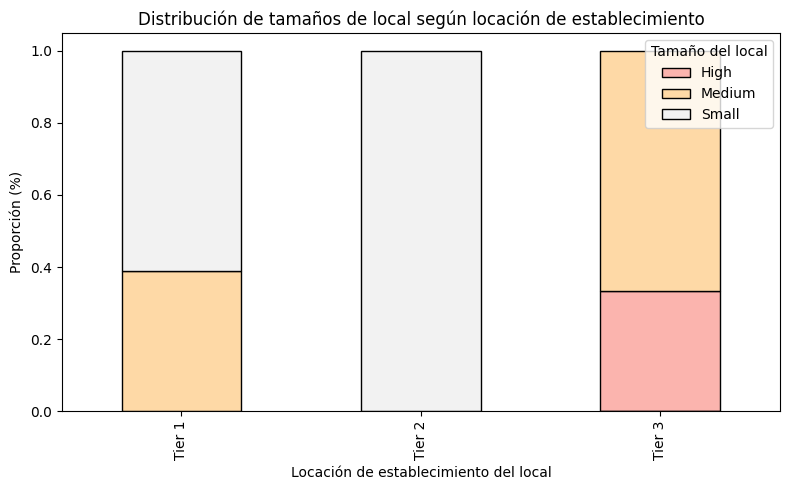

In [27]:
# Creamos la tabla cruzada normalizada
cross_year = pd.crosstab(
    index=train['Outlet_Location_Type'],
    columns=train['Outlet_Size']
).apply(lambda r: r/r.sum(), axis=1)

# Gráfico de barras apiladas
cross_year.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='Pastel1',
    edgecolor='black'
)

plt.title("Distribución de tamaños de local según locación de establecimiento")
plt.xlabel("Locación de establecimiento del local")
plt.ylabel("Proporción (%)")
plt.legend(title="Tamaño del local")
plt.tight_layout()
plt.show()

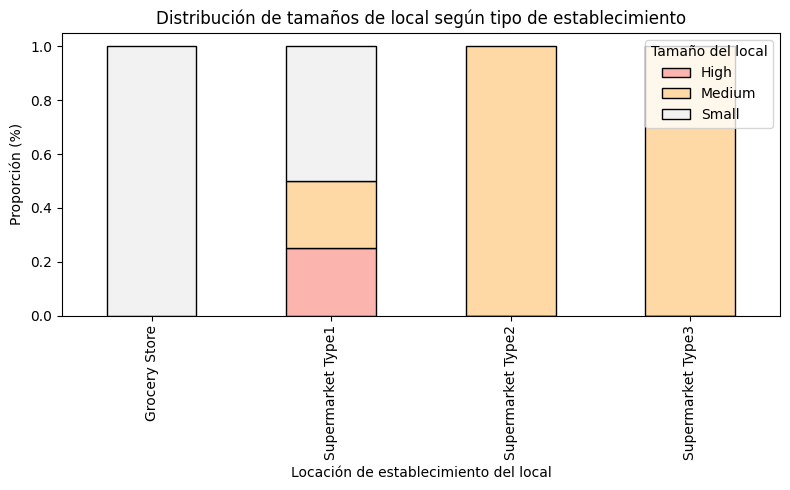

In [28]:
# Creamos la tabla cruzada normalizada
cross_year = pd.crosstab(
    index=train['Outlet_Type'],
    columns=train['Outlet_Size']
).apply(lambda r: r/r.sum(), axis=1)

# Gráfico de barras apiladas
cross_year.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='Pastel1',
    edgecolor='black'
)

plt.title("Distribución de tamaños de local según tipo de establecimiento")
plt.xlabel("Locación de establecimiento del local")
plt.ylabel("Proporción (%)")
plt.legend(title="Tamaño del local")
plt.tight_layout()
plt.show()

### Conclusiones:

- Todas las **Grocery Stores** son de tamaño pequeño.
- Todas los **Supermarket Type2** y **Supermarket Type3** son medianos.
- En la **Tier 2** solo hay locales pequeños.
- En la **Tier 3** tenemos los locales Medianos y Altos. Estos es concordante con el analisis anteiror donde indicaba que la Tier 3 era la que mas vendia.
- No hay datos de tamaño para las tiendas abiertas en los años 1998, 2002 y 2007.

In [29]:
cross_year.columns

Index(['High', 'Medium', 'Small'], dtype='object', name='Outlet_Size')

In [30]:
OUT010 = train.loc[train.Outlet_Identifier == 'OUT010', ['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']].head(1)
OUT010

,Outlet_Size,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year
3,NaN,Grocery Store,Tier 3,1998


In [31]:
OUT045 = train.loc[train.Outlet_Identifier == 'OUT045', ['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']].head(1)
OUT045

,Outlet_Size,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year
8,NaN,Supermarket Type1,Tier 2,2002


In [32]:
OUT017 = train.loc[train.Outlet_Identifier == 'OUT017', ['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']].head(1)
OUT017

,Outlet_Size,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year
9,NaN,Supermarket Type1,Tier 2,2007


In [33]:
train.Outlet_Size.value_counts() / train.Outlet_Size.value_counts().sum()



Outlet_Size
Medium    0.456895
Small     0.390643
High      0.152462
Name: count, dtype: float64

### One-Hot-Encoding
Con el objetivo de luego hacer una imputacion por KNN debemos previamente aplicar OHE a las variables categoricas.


In [34]:
one_hot_encoded_train = pd.get_dummies(train, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'])

In [35]:
one_hot_encoded_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_Baking Goods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,Medium,3735.1380,True,False,False,...,False,False,False,True,False,False,False,True,False,False
1,DRC01,5.92,0.019278,48.2692,OUT018,Medium,443.4228,False,True,False,...,False,False,True,False,False,True,False,False,True,False
2,FDN15,17.50,0.016760,141.6180,OUT049,Medium,2097.2700,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,FDX07,19.20,0.000000,182.0950,OUT010,NaN,732.3800,False,True,False,...,False,False,False,False,False,True,True,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,High,994.7052,True,False,False,...,False,False,False,False,False,True,False,True,False,False


### KNN Imputer Valores NaN de `Outlet_Size`

Antes de realizar la imputación de los valores faltantes, asignamos **valores numéricos ordinales** a la variable `Outlet_Size`, de la siguiente manera:

- `Small` → 1  
- `Medium` → 2  
- `High` → 3  

Este paso tiene un propósito **intermedio y exclusivamente técnico**:  
permitir que el modelo de imputación basado en *KNN* pueda **calcular distancias más efectivamente**.

Una vez finalizada la imputación, los valores se transformarán posteriormente mediante **One-Hot Encoding**, que es el formato más adecuado para el modelado predictivo.

Validación de resultados obtenidos:

- Una forma de validar la imputación es verificar si todos los locales identificados como **`Grocery Store`** presentan el mismo tamaño (`Outlet_Size`).  
En el análisis previo se observó que uno de los outlets con valor faltante pertenecía precisamente a este tipo, y se esperaba que tuviera el tamaño `Small`, dado que **todas las tiendas de tipo Grocery Store son pequeñas** según los analisis previos.

In [36]:
one_hot_encoded_train.loc[one_hot_encoded_train.Outlet_Size == 'Small', 'Outlet_Size'] = 1
one_hot_encoded_train.loc[one_hot_encoded_train.Outlet_Size == 'Medium', 'Outlet_Size'] = 2
one_hot_encoded_train.loc[one_hot_encoded_train.Outlet_Size == 'High', 'Outlet_Size'] = 3

print("NA ",one_hot_encoded_train.Outlet_Size.isna().sum())
print(one_hot_encoded_train.Outlet_Size.value_counts())


NA  2410
Outlet_Size
2    2793
1    2388
3     932
Name: count, dtype: int64


Guardamos en una variable los indices donde se encuentran los identificadores de los outlets que tengan su tamano faltante. Esto servira para el analisis y validacion posterior.

In [37]:
print(train.loc[:,['Outlet_Identifier','Outlet_Size']].groupby('Outlet_Identifier').size())

print("\nLos outlets con datos NAN son:", train.loc[train.Outlet_Size.isna(), 'Outlet_Identifier'].unique())

print("\nLos valores que encontramos en OUT010 son:", train.loc[train.Outlet_Identifier == 'OUT010', 'Outlet_Size'].unique())
print("\nLos valores que encontramos en OUT045 son:", train.loc[train.Outlet_Identifier == 'OUT045', 'Outlet_Size'].unique())
print("\nLos valores que encontramos en OUT017 son:", train.loc[train.Outlet_Identifier == 'OUT017', 'Outlet_Size'].unique())

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
dtype: int64

Los outlets con datos NAN son: ['OUT010' 'OUT045' 'OUT017']

Los valores que encontramos en OUT010 son: [nan]

Los valores que encontramos en OUT045 son: [nan]

Los valores que encontramos en OUT017 son: [nan]


Todos los valores de los outlets 'OUT010', 'OUT045' y 'OUT017' son NAN. Nos quedamos con los indices de esos para despues analizar los resultados del KNNImposter

In [38]:
indices_OUT010 = train.loc[train.Outlet_Identifier == 'OUT010'].index
indices_OUT045 = train.loc[train.Outlet_Identifier == 'OUT045'].index
indices_OUT017 = train.loc[train.Outlet_Identifier == 'OUT017'].index

Ahora que tenemos todas las variables de interes numericas, se eliminan los identificadores de los Outlets y de los Items. Luego haremos el KNN para intentar buscar los valores faltantes para el tamano de los outlet.

In [39]:
one_hot_encoded_train = one_hot_encoded_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)

En una situacion de un modelo de ML con KNN, habria que normalizar los datos para no generar que las variables con rangos mas amplios influyan mas a la hora de encontrar un resultado que aquellas variables con rangos mas cortos.

Pero en el caso de KNNImposter, el resultado va a darse segun la cercania que hayan entre los valores de las variables en las observaciones mas parecidas a la que estamos intentando determinar.

In [40]:
knn = KNNImputer(n_neighbors=5)
neighbors = knn.fit_transform(one_hot_encoded_train)

result_KNN = pd.DataFrame(data=neighbors, columns=one_hot_encoded_train.columns)


Analizamos los resultados del KNNImputer

In [41]:
print('La media de Outlet_Size propuesta por KNN para OUT010 es ',result_KNN.loc[indices_OUT010, 'Outlet_Size'].mean())
print('La media de Outlet_Size propuesta por KNN para OUT045 es ',result_KNN.loc[indices_OUT045, 'Outlet_Size'].mean())
print('La media de Outlet_Size propuesta por KNN para OUT017 es ',result_KNN.loc[indices_OUT017, 'Outlet_Size'].mean())


La media de Outlet_Size propuesta por KNN para OUT010 es  1.2576576576576577
La media de Outlet_Size propuesta por KNN para OUT045 es  1.7916038751345533
La media de Outlet_Size propuesta por KNN para OUT017 es  1.8138228941684664


El `Outlet_Size` propuesto por KNNImputer para el `OUT010`, es el esperado ya que este resulto cercano a 1 y esto significa que su tamaño es *small*. Esto es logico porque el registro pertenece a una **Grocery Store**, las cuales son siempre *small*

Por otro lado, para los otros dos Outlets vamos a tener que confiar en este resultado, teniendo en cuenta que es el mas repetido de los 3 tamanos, y que el OUT010 probablemente haya sido predicho correctamente, vamos a dejar esos resultados.

In [42]:
result_KNN.loc[indices_OUT010, 'Outlet_Size'] = 1
result_KNN.loc[indices_OUT045, 'Outlet_Size'] = 2
result_KNN.loc[indices_OUT017, 'Outlet_Size'] = 2

# Tambien se agrega al DF de train para poder hacer analisis sobre las variables categoricas
# sin haberse generado el One-Hot-Encoding

train.loc[indices_OUT010, 'Outlet_Size'] = 'Small'
train.loc[indices_OUT045, 'Outlet_Size'] = 'Medium'
train.loc[indices_OUT017, 'Outlet_Size'] = 'Medium'

Ahora estamos en condiciones de terminar nuestro One-Hot-Encoding de esta variable, y con esto podemos seguir con el analisis de los datos, habiendo resuelto el problema de los datos NAN.

In [43]:
train_to_model = pd.get_dummies(result_KNN, columns = ['Outlet_Size'])

<Figure size 1200x600 with 0 Axes>

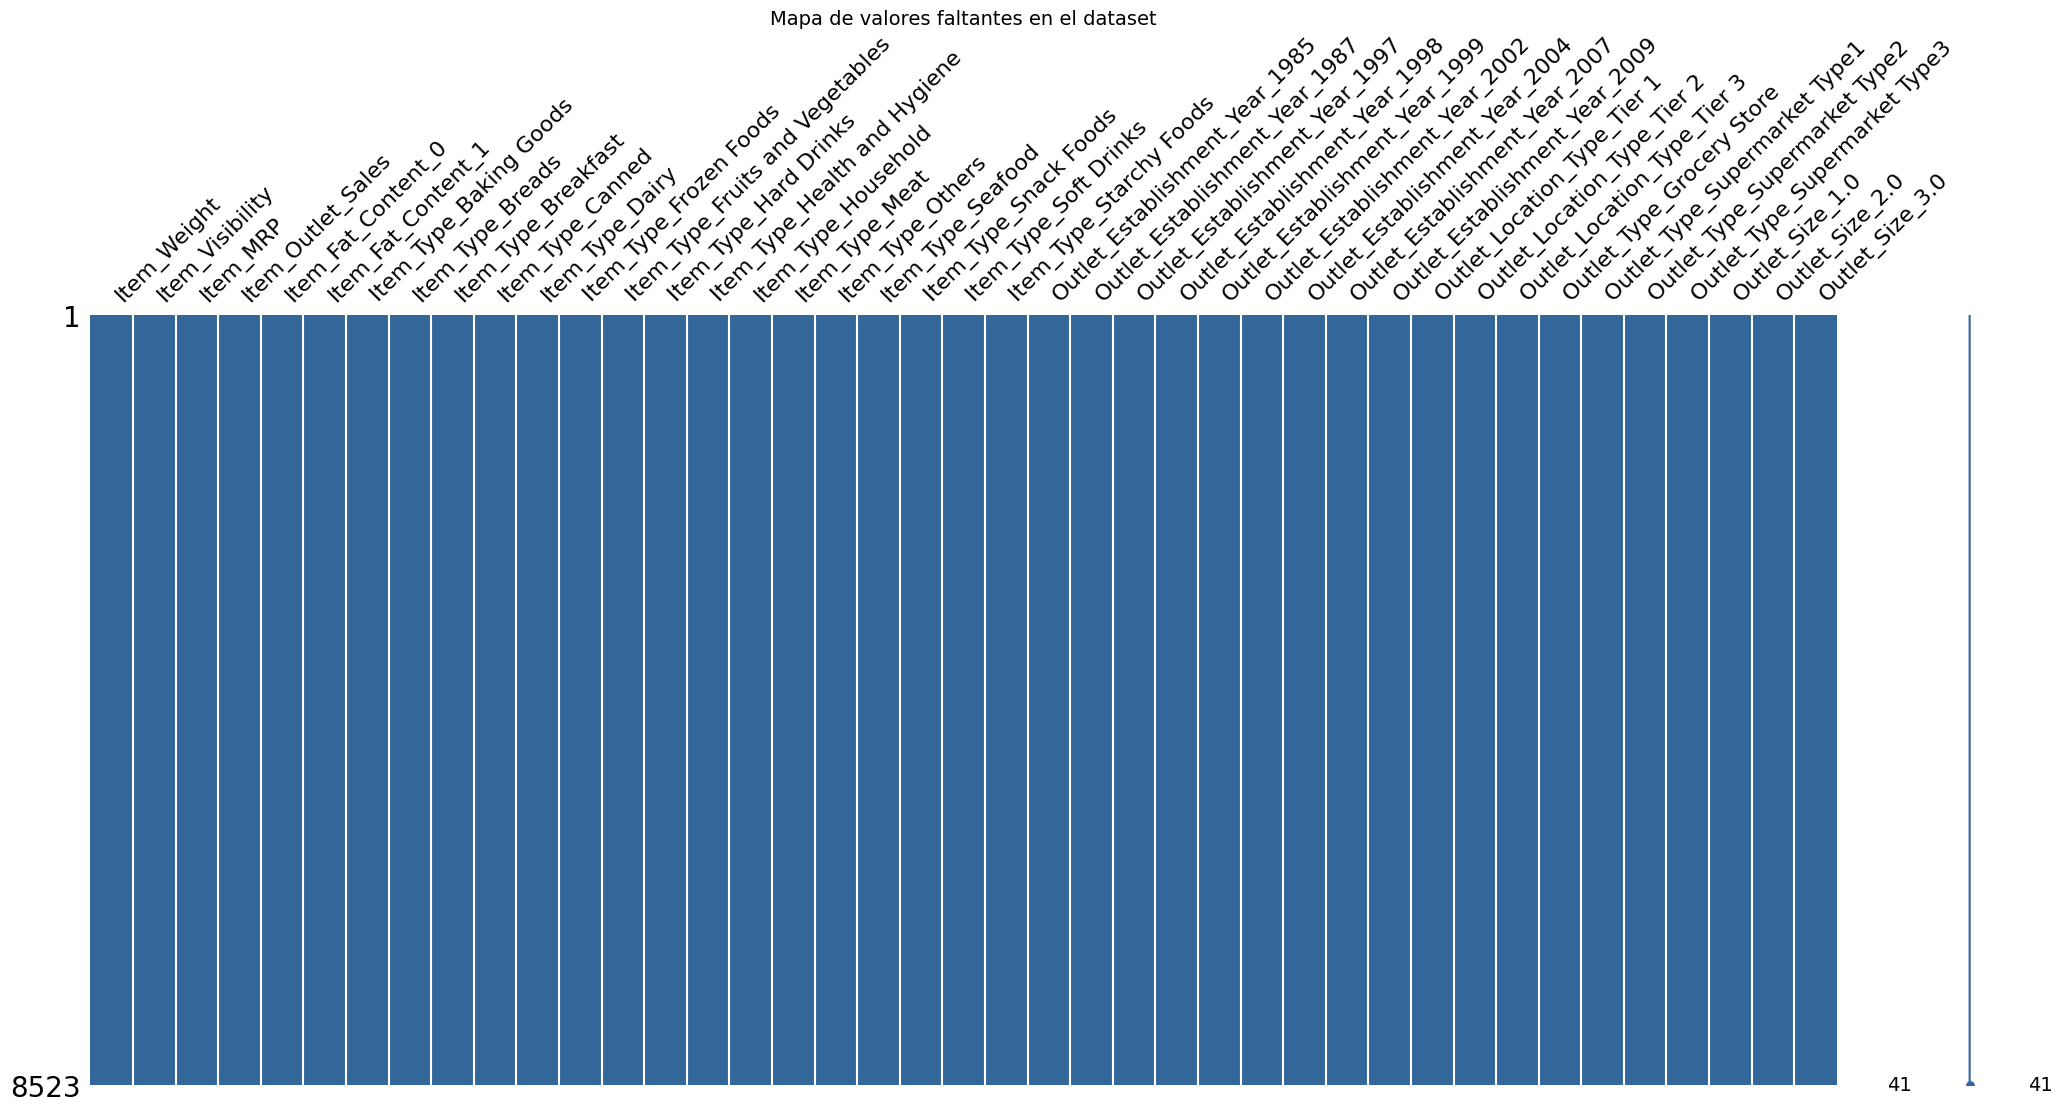

In [44]:
# Gráfico tipo "matrix" de valores faltantes
plt.figure(figsize=(12,6))
msno.matrix(train_to_model, color=(0.2, 0.4, 0.6))
plt.title("Mapa de valores faltantes en el dataset", fontsize=14)
plt.show()

# Tabla resumen de valores faltantes
missing_table = (
    train_to_model.isnull()
         .sum()
         .to_frame(name='Valores Nulos')
         .assign(Porcentaje=lambda df: (df['Valores Nulos'] / len(train_to_model) * 100).round(2))
         .query('`Valores Nulos` > 0')  # solo columnas con nulos
         .sort_values(by='Porcentaje', ascending=False)
)

## Correlación de variables

Antes de hacer el analisis de coeficiente de Pearson tenemos que normalizar los datos. Teniendo en cuenta los analisis anteriores, veiamos que los violin plot de las columnas ``Item_Visibility y `Item_Outlet_Sales` tienen distribuciones que con una transformacion logaritmica podrían acercarse a la forma de una normal.

In [45]:
train_to_plot = copy.deepcopy(train)
# Transformacion logaritmica sumando 1 para evitar tener numeros negativos
train_to_plot.Item_Visibility = np.log2(train.Item_Visibility + 1)**(1/2)
train_to_plot.Item_Outlet_Sales = (train_to_plot.Item_Outlet_Sales)**(1/2)


train_to_plot.loc[:, columnas_numericas].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.869378,0.274870,140.992782,42.944777
std,4.653372,0.123290,62.275067,18.359591
min,0.000000,0.000000,31.290000,5.769749
25%,8.785000,0.196014,93.826500,28.883339
50%,12.600000,0.275282,143.012800,42.359544
75%,16.850000,0.361088,185.643700,55.689284
max,21.350000,0.640062,266.888400,114.398273


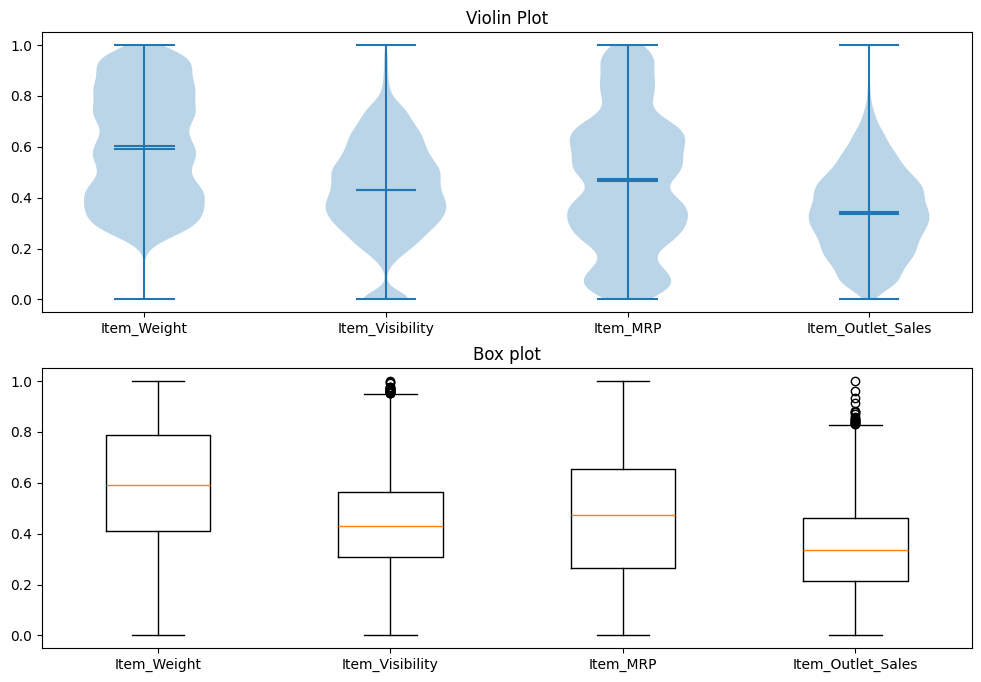

In [46]:
scaler = MinMaxScaler()
train_to_plot_num = scaler.fit_transform(train_to_plot.loc[:, columnas_numericas])
train_to_plot_num = pd.DataFrame(data=train_to_plot_num, columns = columnas_numericas)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot_num.astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_numericas) + 1))
axs[0].set_xticklabels(columnas_numericas)

# plot box plot
axs[1].boxplot(train_to_plot_num.astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_numericas)
axs[1].set_xticks(range(1, len(columnas_numericas) + 1))
axs[1].set_xticklabels(columnas_numericas)

plt.show()

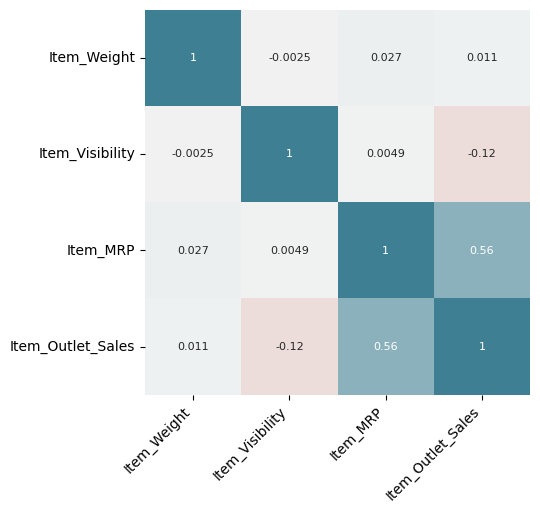

In [47]:
# Matriz de correlacion de variables
matriz_correlacion = train_to_plot.loc[:, columnas_numericas].corr()
# Etiquetas
labs = train_to_plot.loc[:, columnas_numericas].columns
# Mapa de calor
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    matriz_correlacion,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

La mayor relacion linear encontrada se da entre las variables `Item_Outlet_Sales` y `Item_MRP`.

Text(0, 0.5, 'Item_MRP')

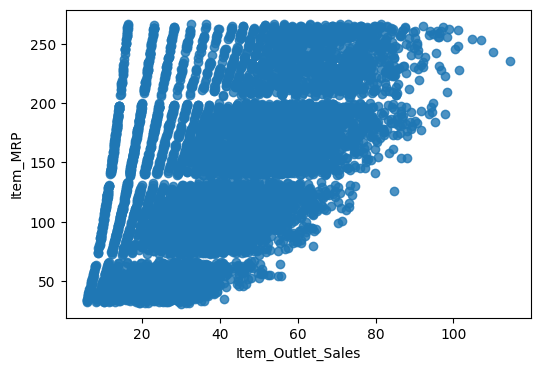

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=train_to_plot.Item_Outlet_Sales, y=train_to_plot.Item_MRP, alpha= 0.8)
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Item_MRP')

A pesar de los esfuerzos por normalizar la variable de `Ìtem_MRP`, no se encuentra ninguna relación entre estas dos variables.

In [49]:
train_to_plot.Item_MRP.describe

<bound method NDFrame.describe of 0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64>

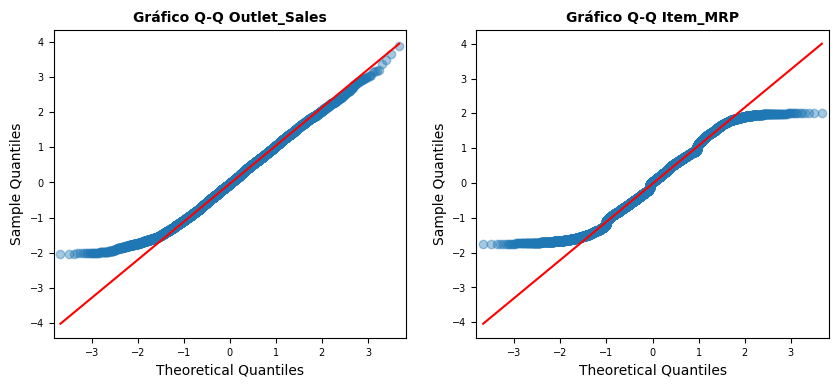

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    train_to_plot.Item_Outlet_Sales,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q Outlet_Sales', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    train_to_plot.Item_MRP,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q Item_MRP', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

El grafico Q-Q nos muestra que ninguna de las dos variables tiene una distribucion normal perfecta (la variable `Item_MRP` tiene una distribucion muy diferente a la normal).
Los metodos de correlacion de Pearson parten de la base o el requerimiento de que las variables a correlacionar deben ser normales. Y en este caso ninguna lo es. Esto puede explicar probablemente la poca correlacion que hay entre las variables. Y el resultado del mapa de correlaciones con Heatmap probablemente tenga un gran porcentaje de "azar" en su resultado.

No se encuentran mucha correlacion lineal entre las variables numericas. Si es interesante ver que existe alguna relacion entre el valor a predecir y las otras variables segun algunos limites que toman los valores.

Vamos a categorizar la variable `Item_Outlet_Sales`, es decir, la variable a predecir. La categorizamos en 4 grupos dependiendo de los valores de los rangos intercuartilicos que arrojan los analisis estadisticos.

Luego de categorizarlo haremos comparaciones y analisis estadisticos con otras variables categoricas.

Esto nos va a permitir hacer un analisis mas extenso de las variables continuas con respecto a la variable a predecir categorizada.

In [51]:
columnas_categoricas = [['Item_Fat_Content',
       'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

columnas_continuas = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

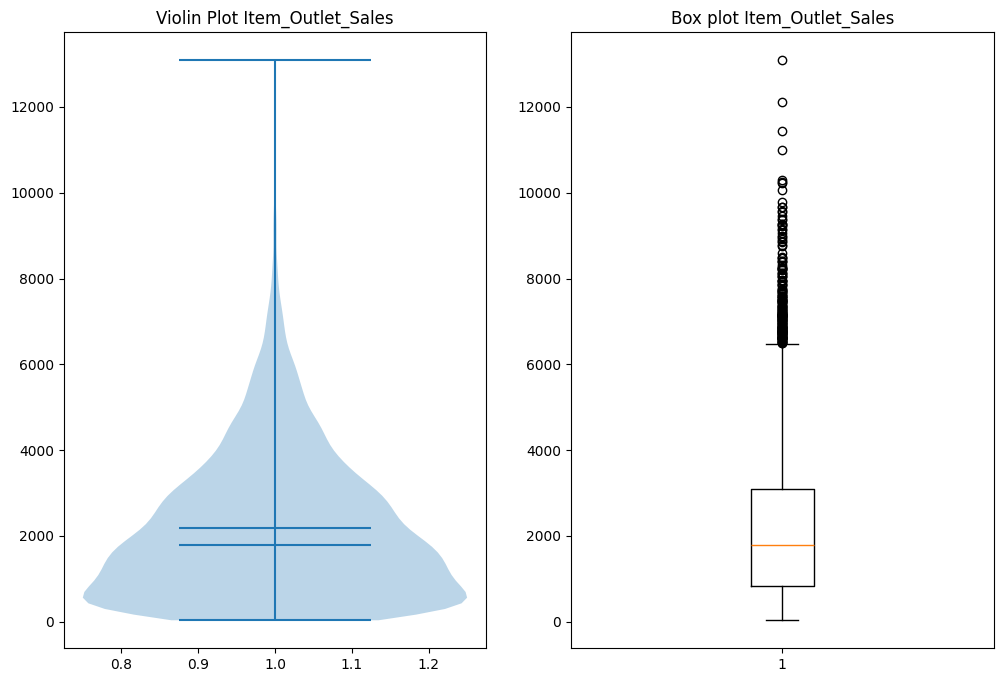

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))


axs[0].violinplot(train.Item_Outlet_Sales.astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot Item_Outlet_Sales')


# plot box plot
axs[1].boxplot(train.Item_Outlet_Sales.astype('float64'))
axs[1].set_title('Box plot Item_Outlet_Sales')

plt.show()

In [53]:
train_to_plot = copy.deepcopy(train)

In [54]:
train_to_plot.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [55]:
# Crear la nueva columna vacía
train_to_plot = train_to_plot.assign(Item_Outlet_Sales_Rango=None)

# Definir los cuartiles manualmente (podrías usar np.percentile o describe() también)
pc25 = 834.247400
pc50 = 1794.331000
pc75 = 3101.296400

# Asignar rangos según los cuartiles
train_to_plot.loc[train_to_plot['Item_Outlet_Sales'] <= pc25, 'Item_Outlet_Sales_Rango'] = 'Very Low'
train_to_plot.loc[(train_to_plot['Item_Outlet_Sales'] > pc25) & (train_to_plot['Item_Outlet_Sales'] < pc50), 'Item_Outlet_Sales_Rango'] = 'Low'
train_to_plot.loc[(train_to_plot['Item_Outlet_Sales'] >= pc50) & (train_to_plot['Item_Outlet_Sales'] < pc75), 'Item_Outlet_Sales_Rango'] = 'High'
train_to_plot.loc[train_to_plot['Item_Outlet_Sales'] >= pc75, 'Item_Outlet_Sales_Rango'] = 'Very High'

# Verificar la distribución
train_to_plot['Item_Outlet_Sales_Rango'].value_counts()


Item_Outlet_Sales_Rango
High         2134
Very High    2132
Very Low     2131
Low          2126
Name: count, dtype: int64

Vemos que (logicamente) cada categoria tiene casi la misma cantidad de valores.

In [56]:
train_to_plot.Item_Outlet_Sales_Rango.value_counts()

Item_Outlet_Sales_Rango
High         2134
Very High    2132
Very Low     2131
Low          2126
Name: count, dtype: int64

## Otras visualizaciones utilizando el dataset sin datos faltantes

Outlet_Size             High      Medium       Small
Outlet_Type                                         
Grocery Store       0.000000    0.000000  100.000000
Supermarket Type1  16.711494   49.937242   33.351264
Supermarket Type2   0.000000  100.000000    0.000000
Supermarket Type3   0.000000  100.000000    0.000000
__________________________________________________


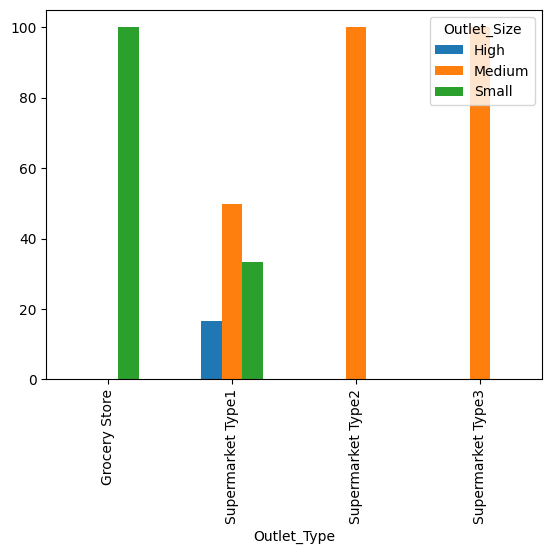

In [57]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Type'], columns=train_to_plot['Outlet_Size']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Outlet_Type'],
            columns=train_to_plot['Outlet_Size']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=False)

Curiosamente, los supermercados tipo 2 y tipo 3 son siempre medianos.

Como habiamos visto a la hora de hacer el OHE, las Grocery Stores son siempre pequenas.

Outlet_Size                High     Medium      Small
Outlet_Location_Type                                 
Tier 1                 0.000000  38.944724  61.055276
Tier 2                 0.000000  66.606822  33.393178
Tier 3                27.820896  55.611940  16.567164
__________________________________________________


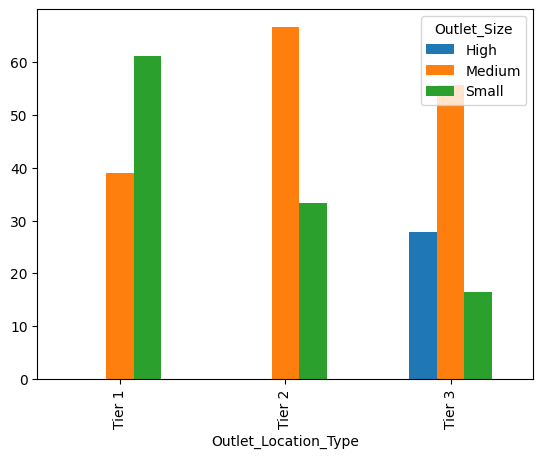

In [58]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Location_Type'], columns=train_to_plot['Outlet_Size']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Outlet_Location_Type'],
            columns=train_to_plot['Outlet_Size']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=False)

Item_Fat_Content                0          1
Item_Type                                   
Baking Goods            50.771605  49.228395
Breads                  55.776892  44.223108
Breakfast               37.272727  62.727273
Canned                  52.542373  47.457627
Dairy                   61.290323  38.709677
Frozen Foods            52.570093  47.429907
Fruits and Vegetables   51.136364  48.863636
Hard Drinks            100.000000   0.000000
Health and Hygiene     100.000000   0.000000
Household              100.000000   0.000000
Meat                    40.000000  60.000000
Others                 100.000000   0.000000
Seafood                 57.812500  42.187500
Snack Foods             57.666667  42.333333
Soft Drinks             84.044944  15.955056
Starchy Foods           55.405405  44.594595
__________________________________________________


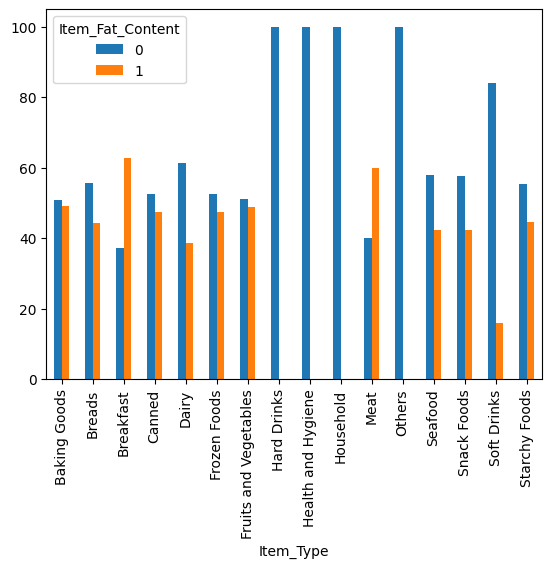

In [59]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Item_Type'], columns=train_to_plot['Item_Fat_Content']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print('_'*50)

plot = pd.crosstab(index=train_to_plot['Item_Type'],
            columns=train_to_plot['Item_Fat_Content']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Outlet_Size                 High      Medium       Small
Outlet_Establishment_Year                               
1985                         0.0   63.909774   36.090226
1987                       100.0    0.000000    0.000000
1997                         0.0    0.000000  100.000000
1998                         0.0    0.000000  100.000000
1999                         0.0  100.000000    0.000000
2002                         0.0  100.000000    0.000000
2004                         0.0    0.000000  100.000000
2007                         0.0  100.000000    0.000000
2009                         0.0  100.000000    0.000000
__________________________________________________


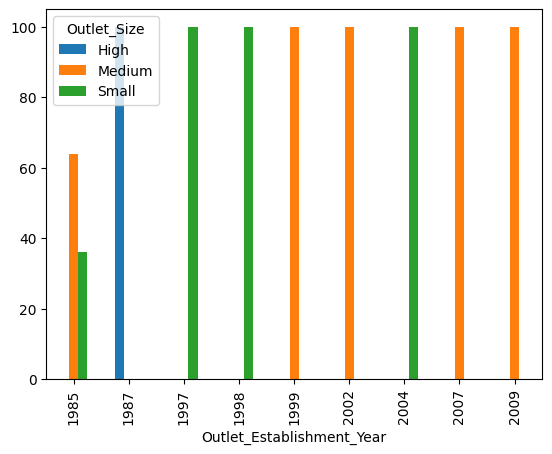

In [60]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'], columns=train_to_plot['Outlet_Size']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print('_'*50)

plot = pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'],
            columns=train_to_plot['Outlet_Size']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Outlet_Type                Grocery Store  Supermarket Type1  \
Outlet_Establishment_Year                                     
1985                           36.090226                0.0   
1987                            0.000000              100.0   
1997                            0.000000              100.0   
1998                          100.000000                0.0   
1999                            0.000000              100.0   
2002                            0.000000              100.0   
2004                            0.000000              100.0   
2007                            0.000000              100.0   
2009                            0.000000                0.0   

Outlet_Type                Supermarket Type2  Supermarket Type3  
Outlet_Establishment_Year                                        
1985                                     0.0          63.909774  
1987                                     0.0           0.000000  
1997                                     0

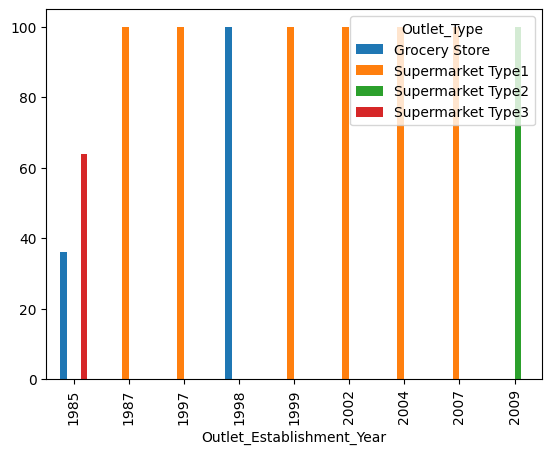

In [61]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'], columns=train_to_plot['Outlet_Type']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print('_'*50)

plot = pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'],
            columns=train_to_plot['Outlet_Type']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Item_Outlet_Sales_Rango       High        Low  Very High   Very Low
Outlet_Type                                                        
Grocery Store             0.000000   5.632502   0.000000  94.367498
Supermarket Type1        29.836830  28.599606  25.748610  15.814954
Supermarket Type2        26.724138  33.836207  19.073276  20.366379
Supermarket Type3        23.743316  16.684492  55.508021   4.064171
__________________________________________________


<Axes: xlabel='Outlet_Type'>

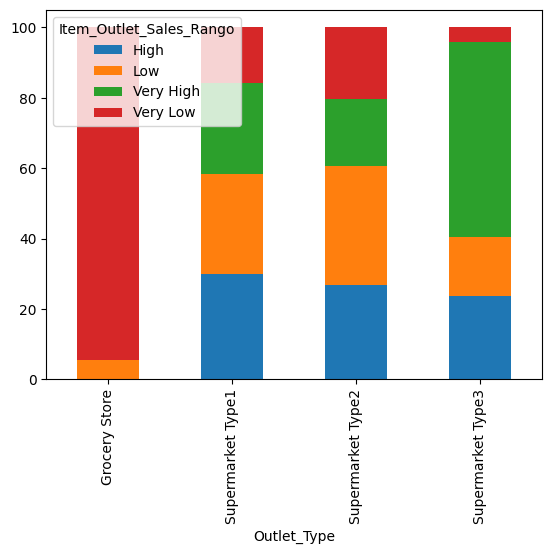

In [62]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Type'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
pd.crosstab(index=train_to_plot['Outlet_Type'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Item_Outlet_Sales_Rango       High        Low  Very High   Very Low
Item_Fat_Content                                                   
0                        25.122349  25.394236  24.234185  25.249230
1                        24.883566  24.118430  26.447106  24.550898
__________________________________________________


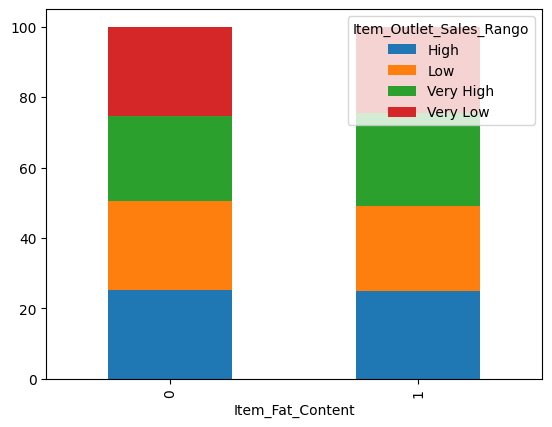

In [63]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Item_Fat_Content'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Item_Fat_Content'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Item_Outlet_Sales_Rango       High        Low  Very High   Very Low
Item_Type                                                          
Baking Goods             23.456790  27.469136  20.987654  28.086420
Breads                   27.091633  25.099602  26.294821  21.513944
Breakfast                21.818182  21.818182  23.636364  32.727273
Canned                   26.656394  25.577812  25.115562  22.650231
Dairy                    19.941349  26.539589  27.565982  25.953079
Frozen Foods             22.897196  26.752336  24.415888  25.934579
Fruits and Vegetables    23.782468  25.974026  27.191558  23.051948
Hard Drinks              25.700935  24.766355  24.766355  24.766355
Health and Hygiene       27.884615  25.769231  19.230769  27.115385
Household                27.692308  20.879121  26.923077  24.505495
Meat                     27.529412  22.117647  23.294118  27.058824
Others                   28.402367  23.668639  20.710059  27.218935
Seafood                  25.000000  10.937500  3

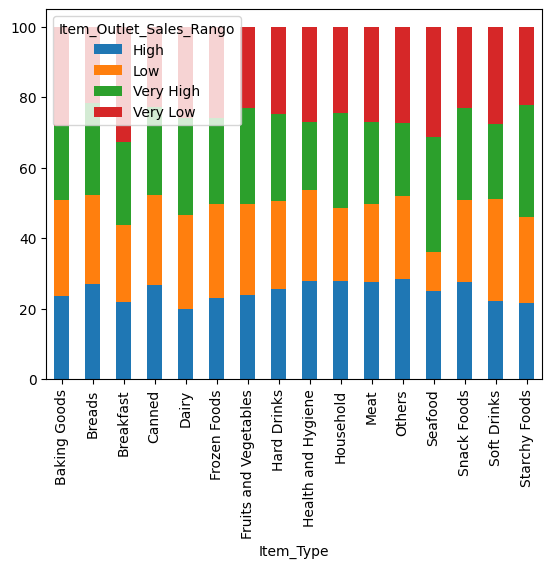

In [64]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Item_Type'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Item_Type'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Item_Outlet_Sales_Rango       High        Low  Very High   Very Low
Outlet_Size                                                        
High                     29.721030  25.751073  26.394850  18.133047
Medium                   27.775387  28.012048  29.905336  14.307229
Small                    19.232076  19.843697  16.853551  44.070676
__________________________________________________


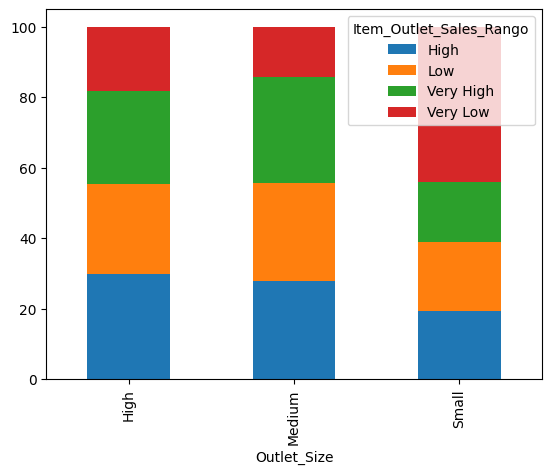

In [65]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Size'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Outlet_Size'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Item_Outlet_Sales_Rango         High        Low  Very High   Very Low
Outlet_Establishment_Year                                            
1985                       15.174299  12.576897  35.475051  36.773753
1987                       29.721030  25.751073  26.394850  18.133047
1997                       29.247312  30.430108  24.838710  15.483871
1998                        0.000000   5.945946   0.000000  94.054054
1999                       27.419355  29.892473  27.634409  15.053763
2002                       28.955867  32.292788  22.174381  16.576964
2004                       31.612903  25.806452  28.494624  14.086022
2007                       32.073434  27.429806  24.946004  15.550756
2009                       26.724138  33.836207  19.073276  20.366379
__________________________________________________


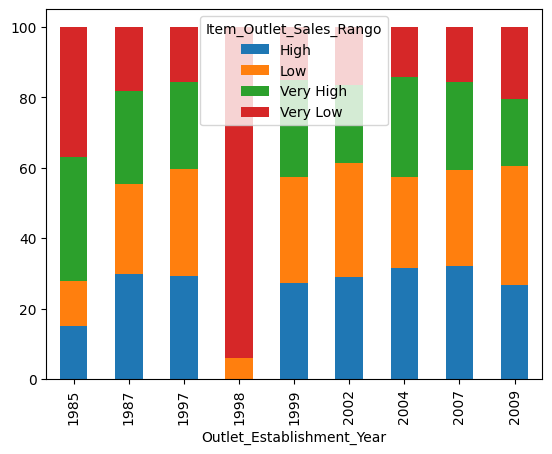

In [66]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Asocio la mayoria de ventas Very Low de los outlets de 1998 al hecho de que en 1998 todos los Outlets fundados fueron Grocery Stores, y como ya vimos, los Grocery Stores destacaban por tener ventas en su gran mayoria de la categoria Very Low.

In [67]:
train_to_plot.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Outlet_Sales_Rango'],
      dtype='object')

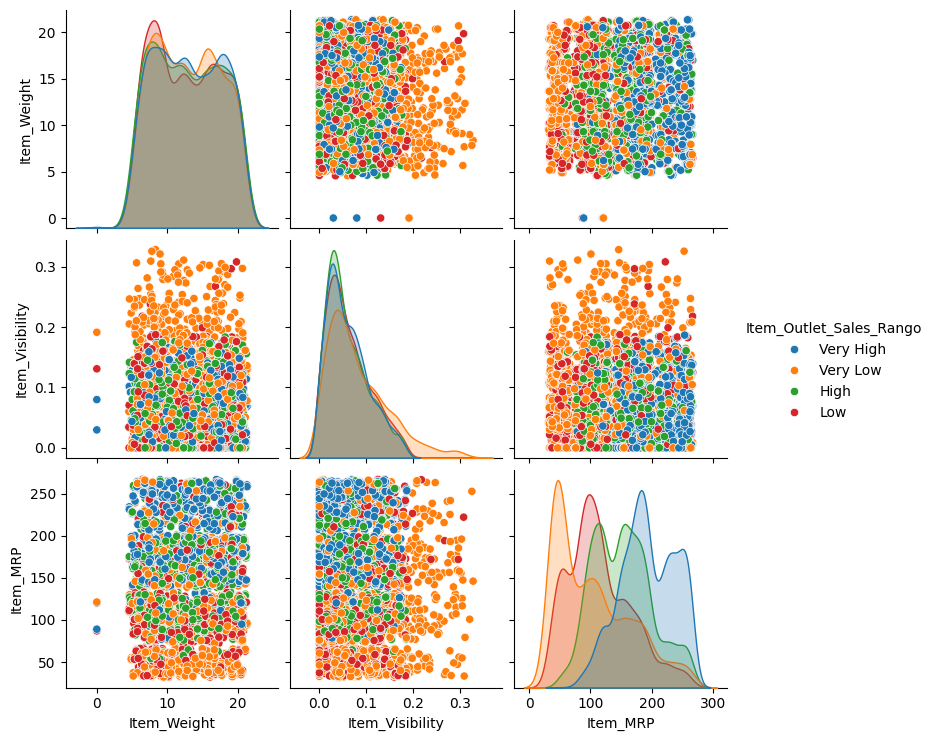

In [68]:
columnas_continuas = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

sns.pairplot(train_to_plot, hue = 'Item_Outlet_Sales_Rango', vars = columnas_continuas)

Curiosamente, cuando analizamos las variables continuas teniendo en cuenta las cuatro categorias generadas en los rangos intercuartilicos, vemos que se genera una agrupacion de los datos en casi todas las variables.

Destaca la agrupacion de los datos *Very Low*, y la separacion entre las distribuciones de `Item_MRP` teniendo en cuenta la variable de prediccion.

Si recordamos, previamente habiamos visto que se generaba cierta correlacion entre las variables `Item_MRP` y la variable a predecir. Es curioso que habiendo llegado a la conclusion de que el resultado era erroneo por no cumplir el requisito de tener ambas variables una distribucion normal, volvemos a ver que encontramos cierta agrupacion o relacion entre ambas variables.

# Reducción de dimensionalidad

## PCA y analisis de importancia de las variables

Al tener variables categoricas y continuas en mi DataSet, vamos a hacer el analisis de componentes principales por separado.

Para analizar las variables continuas, usamos PCA. Para la variables categorias, usamos MCA.

In [69]:
columnas_continuas = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [70]:
train_to_model.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       

In [71]:
# Armamos dos DF con los datos categoricos y numericos por separado.
train_PCA = train.loc[:, columnas_continuas]
train_MCA = train_to_model.drop(columnas_continuas, axis = 1).drop(['Item_Outlet_Sales'], axis = 1)

In [72]:

print(train_PCA.columns)
print(train_MCA.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')
Index(['Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Out

## MCA

In [73]:
# Inicializar y ajustar el modelo MCA
mca = MCA(
    n_components=len(train_MCA.columns),
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42,
    one_hot=True
)

mca.fit(train_MCA)


,n_components,37
,n_iter,10
,copy,True
,check_input,True
,random_state,42
,engine,'sklearn'
,one_hot,True
,one_hot_prefix_sep,'__'
,one_hot_columns_to_drop,None
,correction,None


In [74]:
summaryMCA = pd.DataFrame(mca.eigenvalues_summary)
summaryMCA

summaryMCA['% of variance'] = summaryMCA['% of variance'].apply(lambda x: float(x.replace('%', '')))
summaryMCA['% of variance (cumulative)'] = summaryMCA['% of variance (cumulative)'].apply(lambda x: float(x.replace('%', '')))

     

In [75]:
summaryMCA.head()

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.107,10.66,10.66
1,0.092,9.21,19.87
2,0.075,7.52,27.39
3,0.063,6.27,33.66
4,0.062,6.16,39.82


In [76]:
column_coordinates = mca.column_coordinates(train_MCA)

# Mostrar las coordenadas de las columnas
column_coordinates.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
Item_Fat_Content_0__0.0,0.003869,-0.004736,-0.027984,1.202959,-0.491675,-0.014903,0.010142,0.006198,0.015220,0.020274,...,0.059097,-0.046763,-0.026429,-0.012192,0.021561,0.00491,-0.020155,-0.007441,0.021408,0.015402
Item_Fat_Content_0__1.0,-0.002108,0.002580,0.015247,-0.655446,0.267894,0.008120,-0.005526,-0.003377,-0.008293,-0.011046,...,0.059097,-0.046763,-0.026429,-0.012192,0.021561,0.00491,-0.020155,-0.007441,0.021408,0.015402
Item_Fat_Content_1__0.0,-0.002108,0.002580,0.015247,-0.655446,0.267894,0.008120,-0.005526,-0.003377,-0.008293,-0.011046,...,0.059097,-0.046763,-0.026429,-0.012192,0.021561,0.00491,-0.020155,-0.007441,0.021408,0.015402
Item_Fat_Content_1__1.0,0.003869,-0.004736,-0.027984,1.202959,-0.491675,-0.014903,0.010142,0.006198,0.015220,0.020274,...,0.059097,-0.046763,-0.026429,-0.012192,0.021561,0.00491,-0.020155,-0.007441,0.021408,0.015402
Item_Type_Baking Goods__0.0,0.001242,-0.002096,-0.000723,-0.034122,0.014352,0.000868,-0.000346,0.003923,-0.048972,-0.068881,...,0.059097,-0.046763,-0.026429,-0.012192,0.021561,0.00491,-0.020155,-0.007441,0.021408,0.015402


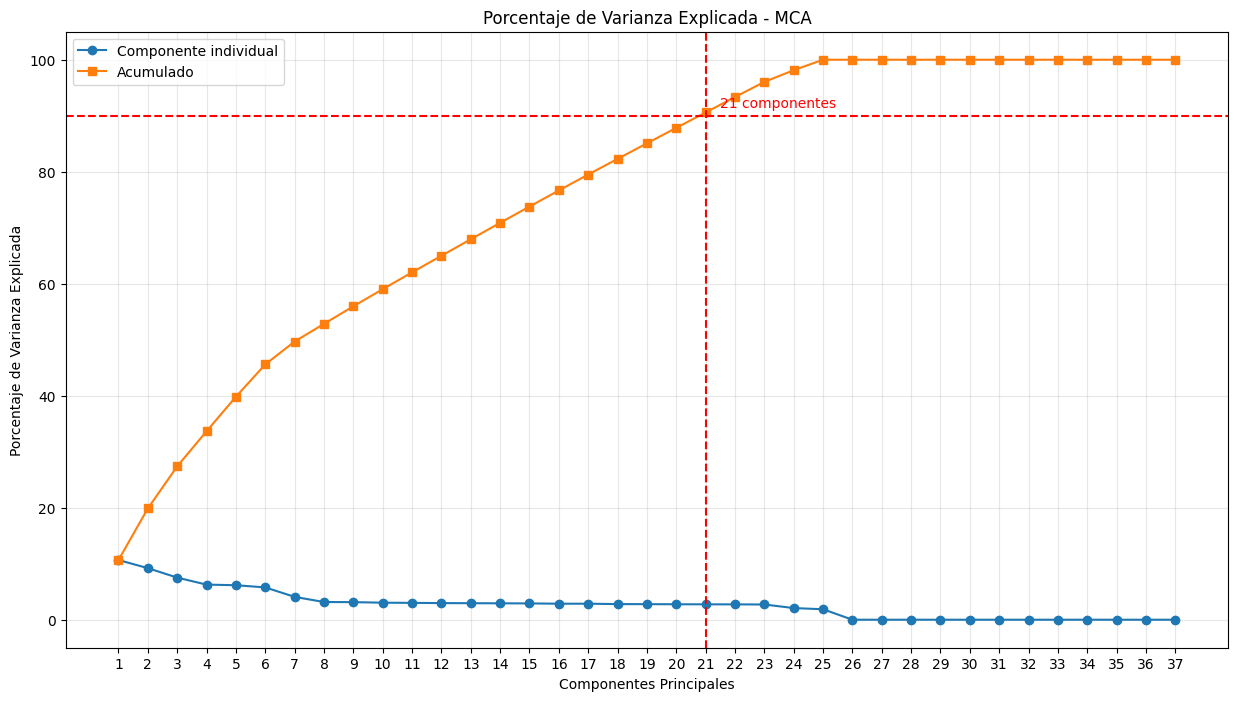

In [77]:
plt.figure(figsize=(15, 8))

# Curvas de varianza individual y acumulada
plt.plot(range(1, len(summaryMCA) + 1),
         summaryMCA['% of variance'],
         '-o', label='Componente individual')

plt.plot(range(1, len(summaryMCA) + 1),
         summaryMCA['% of variance (cumulative)'],
         '-s', label='Acumulado')

# Etiquetas y leyenda
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xticks(range(1, len(summaryMCA) + 1))
plt.legend(loc=2)

# Línea horizontal al 90 %
plt.axhline(y=90, color='red', linestyle='--', label='90% de varianza explicada')

# Calcular el número de componentes que alcanza el 90 %
n_componentes_90 = (summaryMCA['% of variance (cumulative)'] >= 90).idxmax() + 1

# Línea vertical en el componente correspondiente
plt.axvline(x=n_componentes_90, color='red', linestyle='--')

# Texto explicativo en el gráfico
plt.text(n_componentes_90 + 0.5, 91,
         f'{n_componentes_90} componentes',
         color='red', fontsize=10, va='bottom')

plt.title('Porcentaje de Varianza Explicada - MCA')
plt.grid(alpha=0.3)
plt.show()


### Conclusiones

- Los primeros **7 variables** explican aproximadamente **la mitad de la varianza total**.
- El 90% de la varianza se explica con 21 variables. 
- Sin embargo vemos que a partir del **componente 24**, la explicacion aportada es minima. Diria despreciable. Es por esto que para nuestro analisis vamos a tomar solamente las 24 primeras componentes que arroja como resultado el MCA.

In [78]:
mca = MCA(n_components=24)  # Ajusta el número de componentes según lo que hayas utilizado
mca.fit(train_MCA)

,n_components,24
,n_iter,10
,copy,True
,check_input,True
,random_state,None
,engine,'sklearn'
,one_hot,True
,one_hot_prefix_sep,'__'
,one_hot_columns_to_drop,None
,correction,None


In [79]:
MCA_proyectado = mca.transform(train_MCA)

In [80]:
MCA_proyectado.shape

(8523, 24)

In [81]:
MCA_proyectado.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.169487,-0.084020,-0.142221,0.051950,0.506098,-0.012419,0.210401,0.072716,-0.039723,-0.156599,...,-0.041980,-0.127182,0.021775,-0.010833,-0.067605,0.014946,-0.048072,-0.034483,-0.030459,0.093572
1,0.556831,-0.244903,-0.093265,0.200831,-0.068928,0.491856,-0.079270,-0.005029,0.042900,-0.004132,...,-0.060873,0.407176,0.487666,-0.167853,-0.147283,-0.036875,0.006731,0.003628,-0.026164,-0.286025
2,-0.159172,-0.078545,-0.156118,0.118607,0.468557,-0.026196,0.212462,0.084972,-0.045931,-0.191155,...,-0.039105,0.489308,-0.355283,0.188651,-0.113844,0.013240,-0.119390,-0.064158,-0.039155,0.270439
3,0.244110,0.584956,-0.029034,0.170801,-0.478355,0.082223,0.468628,-0.291097,-0.175747,-0.135424,...,0.034460,-0.043294,0.025872,0.003778,-0.006186,-0.020316,-0.006340,-0.035460,-0.003816,-0.069788
4,0.104177,0.014051,0.766855,-0.228784,0.187318,-0.079773,0.014254,-0.024541,0.001117,-0.014146,...,0.075452,0.001806,-0.035148,-0.061488,-0.036592,-0.004092,-0.004341,0.011737,0.003283,-0.154674


In [82]:
for i in range(0,24):
  print(column_coordinates[i].idxmax())

Outlet_Establishment_Year_2009__1.0
Outlet_Establishment_Year_1998__1.0
Outlet_Establishment_Year_1987__1.0
Item_Fat_Content_0__0.0
Outlet_Establishment_Year_1999__1.0
Outlet_Establishment_Year_2009__1.0
Outlet_Establishment_Year_1998__1.0
Item_Type_Snack Foods__1.0
Item_Type_Frozen Foods__1.0
Outlet_Establishment_Year_2002__1.0
Item_Type_Canned__1.0
Item_Type_Frozen Foods__1.0
Item_Type_Household__1.0
Item_Type_Dairy__1.0
Item_Type_Canned__1.0
Item_Type_Meat__1.0
Item_Type_Soft Drinks__1.0
Item_Type_Hard Drinks__1.0
Item_Type_Breads__1.0
Item_Type_Others__1.0
Item_Type_Starchy Foods__1.0
Item_Type_Breakfast__1.0
Item_Type_Seafood__1.0
Item_Type_Breakfast__1.0


In [83]:
summaryMCA.loc[0:24, '% of variance']

component
0     10.66
1      9.21
2      7.52
3      6.27
4      6.16
5      5.77
6      4.08
7      3.16
8      3.14
9      3.04
10     3.01
11     2.97
12     2.95
13     2.93
14     2.91
15     2.86
16     2.86
17     2.79
18     2.78
19     2.76
20     2.75
21     2.74
22     2.72
23     2.08
24     1.87
Name: % of variance, dtype: float64

## PCA

Primero hacemos un analisis estadistico de las variables continuas a analizar, tanto sin normalizar como normalizadas.

La normalizacion se hara con StandardScale de Scikit.

In [84]:
print("Media de las variables: ")
print(train_PCA.mean(axis=0))

print('\n')

print("Varianza de las variables: ")
print(train_PCA.var(axis=0))

Media de las variables: 
Item_Weight         12.869378
Item_Visibility      0.066132
Item_MRP           140.992782
dtype: float64


Varianza de las variables: 
Item_Weight          21.653873
Item_Visibility       0.002662
Item_MRP           3878.183909
dtype: float64


In [85]:
std_sclr = StandardScaler()
train_PCA_std = pd.DataFrame(std_sclr.fit_transform(train_PCA), index=train_PCA.index, columns=train_PCA.columns)

In [86]:
print("Media de las variables: ")
print(train_PCA_std.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables:
print("Varianza de las variables: ")
print(train_PCA_std.var(axis=0))

Media de las variables: 
Item_Weight        7.002885e-17
Item_Visibility    1.517292e-16
Item_MRP          -1.604828e-16
dtype: float64


Varianza de las variables: 
Item_Weight        1.000117
Item_Visibility    1.000117
Item_MRP           1.000117
dtype: float64


Comprobada la estandarizacion de los datos, genero el PCA del modelo.

In [87]:
pca_train_PCA = PCA()
pca_train_PCA.fit(train_PCA_std)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


Miro el valor absoluto del loading para decidir cuál es el que más contribuye. Cada variable explica mucho de una componente. Es muy probable que no podamos excluir ninguna variable en este caso.

Sigo analizando igualmente.

In [88]:
pca_loadings = pd.DataFrame(pca_train_PCA.components_.T, index=train_PCA.columns, columns=['PC1', 'PC2', 'PC3'])
pca_loadings

,PC1,PC2,PC3
Item_Weight,0.701269,0.034318,0.712071
Item_Visibility,-0.276272,0.933869,0.227073
Item_MRP,0.657188,0.355964,-0.664374


### Ortonormalidad de los componentes principales

In [89]:
pca_loadings.T.dot(pca_loadings)

,PC1,PC2,PC3
PC1,1.000000e+00,-1.110223e-16,-2.498002e-16
PC2,-1.110223e-16,1.000000e+00,1.359024e-16
PC3,-2.498002e-16,1.359024e-16,1.000000e+00


Luego de verificar la ortonormalidad de las componentes principales de cada dimension, podemos confirmar que el PCA es fiable, y seguir con el analisis.

In [90]:
train_PCA_pca = pd.DataFrame(pca_train_PCA.fit_transform(train_PCA_std), columns=['PC1', 'PC2', 'PC3'],\
                      index=train_PCA_std.index)
train_PCA_pca.head()

,PC1,PC2,PC3
0,0.878651,-0.310831,-1.927618
1,-1.775024,-1.429350,-0.280412
2,0.968849,-0.855909,0.484670
3,1.741978,-0.915350,0.239212
4,-1.159141,-1.724120,0.035704


In [91]:
print("Media de los CP: ")
print(train_PCA_pca.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de los CPs: ")
print(train_PCA_pca.var(axis=0))

Media de los CP: 
PC1   -3.627145e-17
PC2    1.374264e-17
PC3   -4.167081e-17
dtype: float64


Varianza de los CPs: 
PC1    1.029155
PC2    0.999241
PC3    0.971956
dtype: float64


/var/folders/y7/m6l0m7cs4x74wr7kzyx5wjhh0000gn/T/ipykernel_23429/2466944673.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
/var/folders/y7/m6l0m7cs4x74wr7kzyx5wjhh0000gn/T/ipykernel_23429/2466944673.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])
/var/folders/y7/m6l0m7cs4x74wr7kzyx5wjhh0000gn/T/ipykernel_23429/2466944673.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

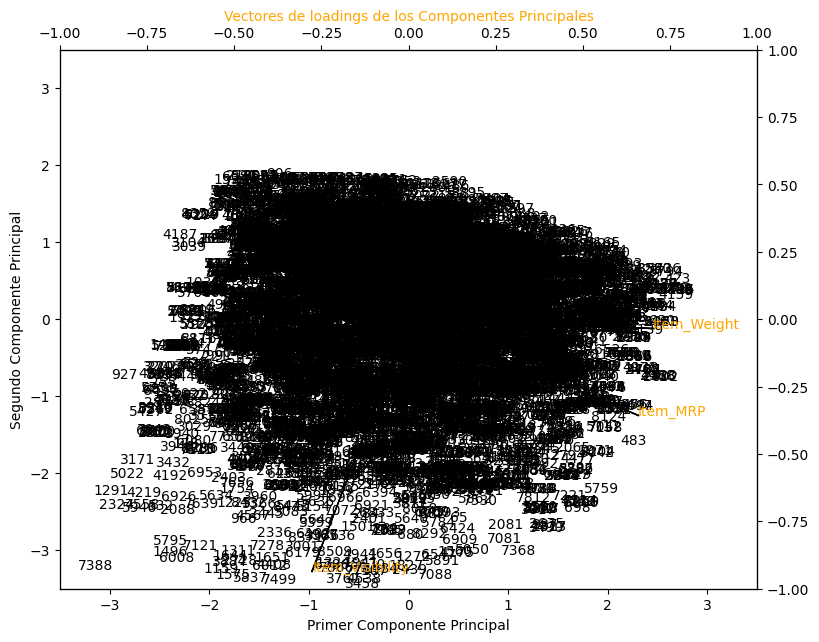

In [92]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in train_PCA_pca.index:
    ax1.annotate(i, (train_PCA_pca.PC1.loc[i], -train_PCA_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
#ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
#ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')

# Creamos ejes secundarios
ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i], -pca_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], -pca_loadings.PC2[2])


In [93]:
pca_train_PCA.explained_variance_

array([1.02915491, 0.999241  , 0.97195612])

In [94]:
pca_train_PCA.explained_variance_ratio_

array([0.34301139, 0.33304125, 0.32394736])

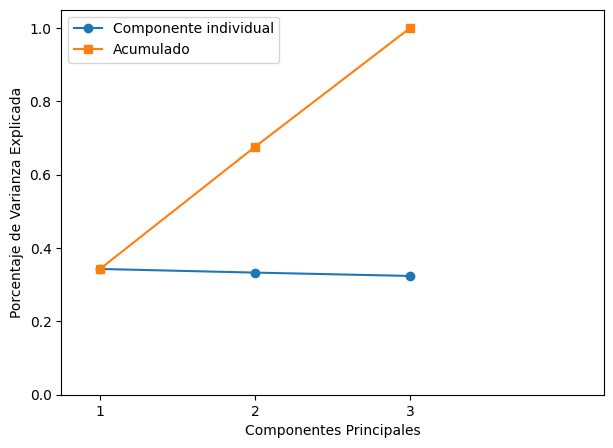

In [95]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3], pca_train_PCA.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3], np.cumsum(pca_train_PCA.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3])
plt.legend(loc=2)

Claramente no podemos eliminar ninguna variable o depender de la explicacion que proporcionan los PCA en las variables continuas.

Cada variable explica practicamente igual la informacion contenida.

## Union de PCA y MCA nuevamente

In [96]:
train_PCA.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [97]:
train_to_model = pd.concat([train_PCA, MCA_proyectado], axis=1)

In [98]:
train_to_model = pd.concat([train_to_model, train.Item_Outlet_Sales], axis=1)

# Transformacion de Datos

Aplicamos las normalizaciones que analizamos antes y las aplicamos al `train_to_model` para luego aplicar los algortimos de machine learning.



In [99]:
train_to_model.head()

,Item_Weight,Item_Visibility,Item_MRP,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,Item_Outlet_Sales
0,9.30,0.016047,249.8092,-0.169487,-0.084020,-0.142221,0.051950,0.506098,-0.012419,0.210401,...,-0.127182,0.021775,-0.010833,-0.067605,0.014946,-0.048072,-0.034483,-0.030459,0.093572,3735.1380
1,5.92,0.019278,48.2692,0.556831,-0.244903,-0.093265,0.200831,-0.068928,0.491856,-0.079270,...,0.407176,0.487666,-0.167853,-0.147283,-0.036875,0.006731,0.003628,-0.026164,-0.286025,443.4228
2,17.50,0.016760,141.6180,-0.159172,-0.078545,-0.156118,0.118607,0.468557,-0.026196,0.212462,...,0.489308,-0.355283,0.188651,-0.113844,0.013240,-0.119390,-0.064158,-0.039155,0.270439,2097.2700
3,19.20,0.000000,182.0950,0.244110,0.584956,-0.029034,0.170801,-0.478355,0.082223,0.468628,...,-0.043294,0.025872,0.003778,-0.006186,-0.020316,-0.006340,-0.035460,-0.003816,-0.069788,732.3800
4,8.93,0.000000,53.8614,0.104177,0.014051,0.766855,-0.228784,0.187318,-0.079773,0.014254,...,0.001806,-0.035148,-0.061488,-0.036592,-0.004092,-0.004341,0.011737,0.003283,-0.154674,994.7052


In [100]:
train_to_model.iloc[:, [1,2,3,4,len(train_to_model.columns)-1]].describe()

,Item_Visibility,Item_MRP,0,1,Item_Outlet_Sales
count,8523.000000,8523.000000,8.523000e+03,8.523000e+03,8523.000000
mean,0.066132,140.992782,-5.081260e-16,-1.258852e-16,2181.288914
std,0.051598,62.275067,3.265061e-01,3.034259e-01,1706.499616
min,0.000000,31.290000,-3.887012e-01,-3.821890e-01,33.290000
25%,0.026989,93.826500,-2.307626e-01,-2.438206e-01,834.247400
50%,0.053931,143.012800,-1.678898e-01,-2.641880e-02,1794.331000
75%,0.094585,185.643700,2.403622e-01,7.483653e-02,3101.296400
max,0.328391,266.888400,5.705420e-01,6.000891e-01,13086.964800


Las columnas provenientes del MCA no se van a transformar, solamente normalizamos para mantener la distribucion, modificando que los valores se encuentren siempre entre 0 y 1

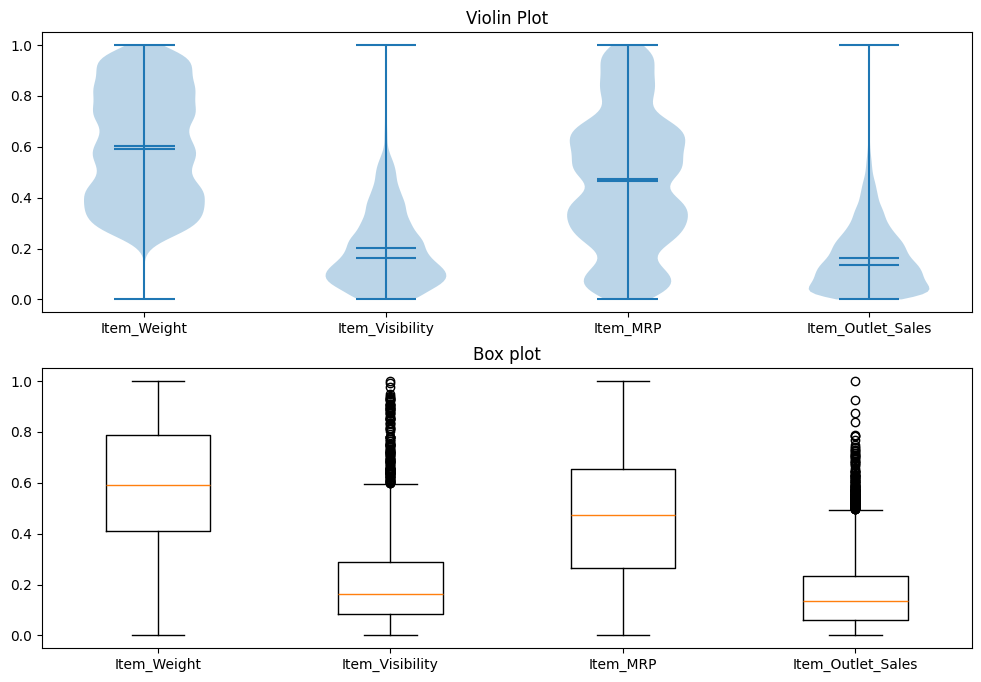

In [101]:
columnas_a_norm = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']


scaler = MinMaxScaler()
train_to_plot_num = scaler.fit_transform(train_to_model.loc[:, columnas_a_norm])
train_to_plot_num = pd.DataFrame(data=train_to_plot_num, columns = columnas_a_norm)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot_num.astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[0].set_xticklabels(columnas_a_norm)

# plot box plot
axs[1].boxplot(train_to_plot_num.astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_a_norm)
axs[1].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[1].set_xticklabels(columnas_a_norm)

plt.show()

In [102]:

# Transformacion logaritmica sumando 1 para evitar tener numeros negativos
train_to_model.Item_Visibility = np.log2(train_to_model.Item_Visibility + 1)**(1/2)
train_to_model.Item_Outlet_Sales = (train_to_model.Item_Outlet_Sales)**(1/2)

In [103]:
train_to_model.iloc[:, [1,2,3,4,len(train_to_model.columns)-1]].describe()

,Item_Visibility,Item_MRP,0,1,Item_Outlet_Sales
count,8523.000000,8523.000000,8.523000e+03,8.523000e+03,8523.000000
mean,0.274870,140.992782,-5.081260e-16,-1.258852e-16,42.944777
std,0.123290,62.275067,3.265061e-01,3.034259e-01,18.359591
min,0.000000,31.290000,-3.887012e-01,-3.821890e-01,5.769749
25%,0.196014,93.826500,-2.307626e-01,-2.438206e-01,28.883339
50%,0.275282,143.012800,-1.678898e-01,-2.641880e-02,42.359544
75%,0.361088,185.643700,2.403622e-01,7.483653e-02,55.689284
max,0.640062,266.888400,5.705420e-01,6.000891e-01,114.398273


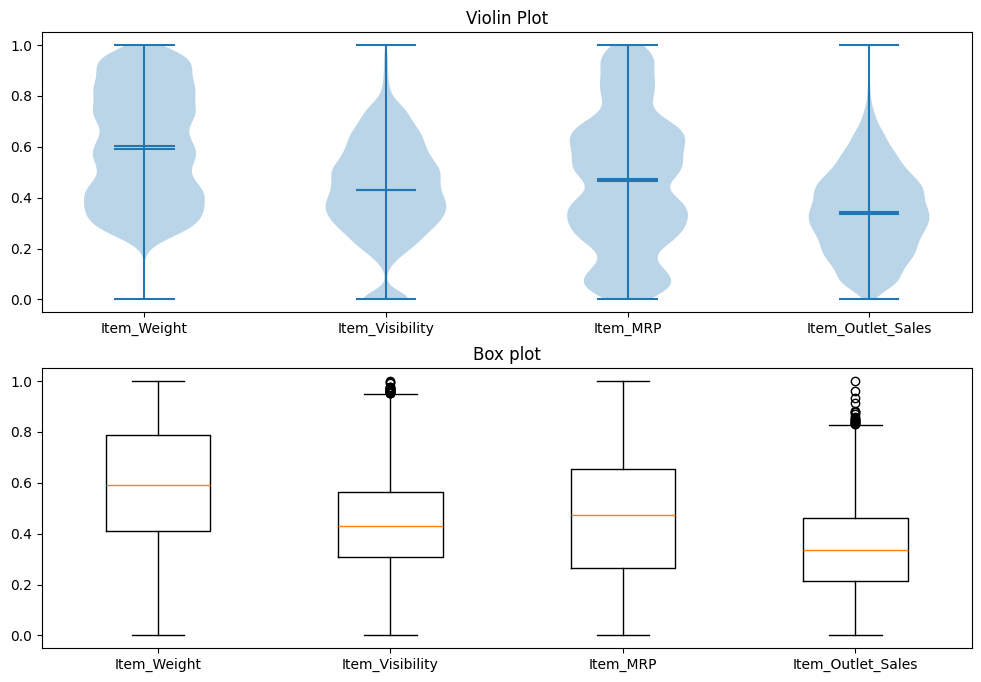

In [104]:
scaler = MinMaxScaler()
train_to_plot_num = scaler.fit_transform(train_to_model.loc[:, columnas_a_norm])
train_to_plot_num = pd.DataFrame(data=train_to_plot_num, columns = columnas_a_norm)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot_num.astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[0].set_xticklabels(columnas_a_norm)

# plot box plot
axs[1].boxplot(train_to_plot_num.astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_a_norm)
axs[1].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[1].set_xticklabels(columnas_a_norm)

plt.show()

Vemos que dentro de lo posible, logramos algo mucho mas parecido a una distribucion normal a lo que teniamos antes.

Ahora vamos a definir el normalizado y tambien estandarizar

In [105]:
nombre_columnas = train_to_model.columns.tolist()

# Crear un diccionario de mapeo para cambiar los nombres a cadenas de texto
num_to_str = {col: str(col) for col in nombre_columnas}
train_to_model = train_to_model.rename(columns= num_to_str)



In [106]:
# Estandarizacion solo de las columnas NO provenientes del MCA
std_sclr = StandardScaler()
for i in columnas_a_norm:
  train_to_model[i] = std_sclr.fit_transform(train_to_model[i].values.reshape(-1, 1))

In [107]:
train_to_model.iloc[:, [1,2,3,4,len(train_to_model.columns)-1]].describe()

,Item_Visibility,Item_MRP,0,1,Item_Outlet_Sales
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,1.375567e-16,-1.604828e-16,-5.081260e-16,-1.258852e-16,-1.900783e-16
std,1.000059e+00,1.000059e+00,3.265061e-01,3.034259e-01,1.000059e+00
min,-2.229594e+00,-1.761688e+00,-3.887012e-01,-3.821890e-01,-2.024948e+00
25%,-6.396375e-01,-7.574307e-01,-2.307626e-01,-2.438206e-01,-7.659355e-01
50%,3.345328e-03,3.243893e-02,-1.678898e-01,-2.641880e-02,-3.187799e-02
75%,6.993527e-01,7.170372e-01,2.403622e-01,7.483653e-02,6.942015e-01
max,2.962242e+00,2.021724e+00,5.705420e-01,6.000891e-01,3.892118e+00


In [108]:
# Normalizacion de todas las variables
scaler = MinMaxScaler()
train_to_model = pd.DataFrame(scaler.fit_transform(train_to_model), index=train_to_model.index, columns=train_to_model.columns)

In [109]:
train_to_model.iloc[:, [1,2,3,4,len(train_to_model.columns)-1]].describe()

,Item_Visibility,Item_MRP,0,1,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.429442,0.465635,0.405217,0.389084,0.342222
std,0.192621,0.264327,0.340379,0.308900,0.169013
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306242,0.265437,0.164649,0.140865,0.212776
50%,0.430087,0.474209,0.230193,0.362189,0.336834
75%,0.564145,0.655156,0.655791,0.465271,0.459544
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
train_to_model.head()

,Item_Weight,Item_Visibility,Item_MRP,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,Item_Outlet_Sales
0,0.435597,0.236775,0.927507,0.228529,0.303549,0.123978,0.499709,0.950523,0.473811,0.639198,...,0.099600,0.452635,0.439125,0.192606,0.404798,0.185660,0.261538,0.129599,0.594132,0.509498
1,0.277283,0.259312,0.072068,0.985706,0.139763,0.170744,0.657361,0.403056,0.983496,0.280940,...,0.803208,0.969815,0.302760,0.118598,0.371464,0.224439,0.282589,0.131552,0.034311,0.140735
2,0.819672,0.241933,0.468288,0.239281,0.309122,0.110702,0.570294,0.914781,0.459887,0.641747,...,0.911353,0.034068,0.612368,0.149658,0.403700,0.135195,0.245146,0.125644,0.854973,0.368469
3,0.899297,0.000000,0.640093,0.659698,0.984594,0.232101,0.625562,0.013251,0.569469,0.958567,...,0.210058,0.457183,0.451814,0.249655,0.382116,0.215189,0.260998,0.141716,0.353214,0.196015
4,0.418267,0.000000,0.095805,0.513820,0.403389,0.992387,0.202436,0.647021,0.405735,0.396609,...,0.269444,0.389445,0.395133,0.221412,0.392552,0.216604,0.287068,0.144945,0.228024,0.237223


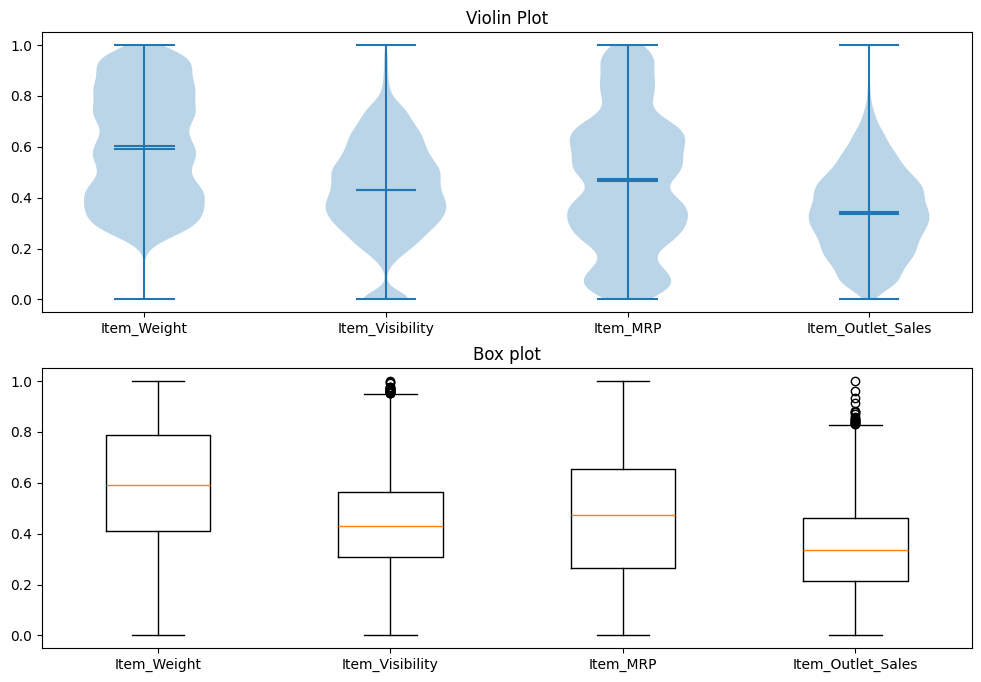

In [111]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_model.loc[:, columnas_a_norm],
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[0].set_xticklabels(columnas_a_norm)

# plot box plot
axs[1].boxplot(train_to_model.loc[:, columnas_a_norm])
axs[1].set_title('Box plot')
axs[1].set_label(columnas_a_norm)
axs[1].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[1].set_xticklabels(columnas_a_norm)

plt.show()

# Modelización

In [112]:
data_y = train_to_model.loc[:, 'Item_Outlet_Sales']
data_x = train_to_model.drop('Item_Outlet_Sales', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm

In [114]:
print(X_train.columns)
print(y_train.shape)
print(len(X_train))
print(len(y_train))
print("_"*50)
print(X_test.columns)
print(y_test.shape)
print(len(X_test))
print(len(y_test))

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23'],
      dtype='object')
(5966,)
5966
5966
__________________________________________________
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23'],
      dtype='object')
(2557,)
2557
2557


En primer lugar y solo a modo de analisis comparativo entre modelos agregamos un Random y un Naive Mean. No tiene ningun sentido funcional.

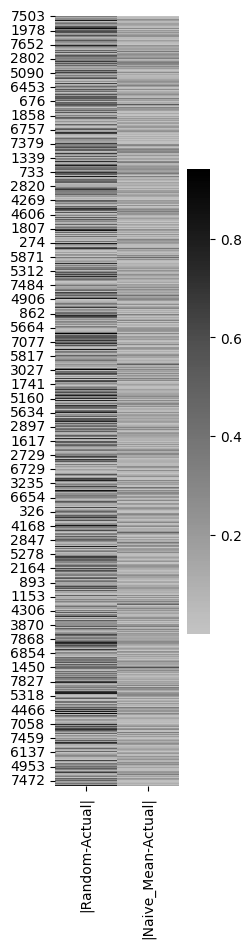

In [115]:
result_df = pd.DataFrame(index=X_test.index, columns=['Random','Naive_Mean','LR','Actual'])
result_df.Actual = y_test

# Method: Naive Mean
result_df.Naive_Mean = y_train.mean()

# Method: Random
result_df.Random = np.random.uniform(y_train.min(), y_train.max(),y_test.shape)

result_df['|Random-Actual|'] = abs(result_df.Random-result_df.Actual)
result_df['|Naive_Mean-Actual|'] = abs(result_df.Naive_Mean-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

## Linear Regression

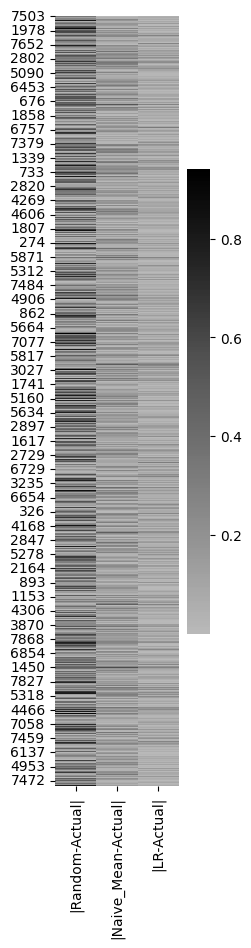

In [116]:
#Method: LR
sales_lm = LinearRegression()
sales_lm.fit(X_train, y_train)
result_df.LR =sales_lm.predict(X_test)

result_df['|LR-Actual|'] = abs(result_df.LR-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [117]:
metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,
                         columns = ['Random','Naive_Mean','LR'])

n_test = len(result_df)

for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

/var/folders/y7/m6l0m7cs4x74wr7kzyx5wjhh0000gn/T/ipykernel_23429/3869847091.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR
ME,-0.161369,-0.008048,-0.001882
RMSE,0.365411,0.168476,0.105117
MAE,0.298183,0.138735,0.083033
MAPE,inf,inf,inf


En el gráfico se observa que el modelo de **Regresión Lineal (LR)** aparece representado con un tono gris ligeramente más claro que el resto.

Como era de esperar, el modelo **Random** muestra el **peor desempeño** en todas las métricas, dado que sus predicciones se generan sin ningún tipo de patrón o aprendizaje.

El modelo **Naive Mean**, que simplemente predice el valor medio de la variable objetivo, mejora ligeramente respecto al aleatorio, pero sigue dando **resultados limitados** al no capturar relaciones reales entre las variables.

Por último, la **Regresión Lineal** obtiene los **mejores resultados en las cuatro métricas evaluadas**, lo que indica que logra capturar cierta relación entre las variables predictoras y la variable objetivo.  
Sin embargo, su rendimiento general sigue siendo **bajo en términos absolutos**, lo que sugiere que **las variables disponibles no presentan una correlación fuerte** con las ventas (`Item_Outlet_Sales`).

Esto confirma lo observado previamente en el **análisis exploratorio**: las correlaciones entre variables eran débiles, por lo que era **esperable que un modelo lineal simple no lograra explicar adecuadamente la variabilidad de las ventas**.


## MLP

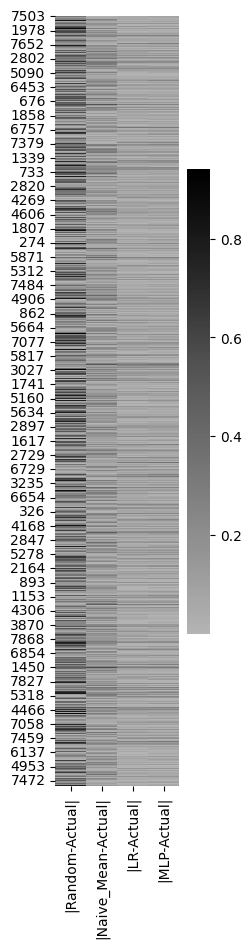

In [118]:
sales_mlp = MLPRegressor(hidden_layer_sizes=10,max_iter=2000)
sales_mlp.fit(X_train, y_train)

result_df['MLP'] = sales_mlp.predict(X_test)
result_df['|MLP-Actual|'] = abs(result_df.MLP-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [119]:
m='MLP'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

/var/folders/y7/m6l0m7cs4x74wr7kzyx5wjhh0000gn/T/ipykernel_23429/2226371926.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP
ME,-0.161369,-0.008048,-0.001882,-0.003792
RMSE,0.365411,0.168476,0.105117,0.107882
MAE,0.298183,0.138735,0.083033,0.085281
MAPE,inf,inf,inf,inf


In [120]:
# Create tuning (validation) set: devide the trainset

X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

print('X_train_s Shape: ', X_train_s.shape)
print('X_tune Shape: ', X_tune.shape)
print('y_train_s Shape: ', y_train_s.shape)
print('y_tune Shape: ', y_tune.shape)

X_train Shape:  (5966, 27)
y_train Shape:  (5966,)
X_train_s Shape:  (4772, 27)
X_tune Shape:  (1194, 27)
y_train_s Shape:  (4772,)
y_tune Shape:  (1194,)


random_state=1 → RSME=0.0983
random_state=2 → RSME=0.0973
random_state=3 → RSME=0.0990
random_state=4 → RSME=0.0992
random_state=5 → RSME=0.0987
random_state=6 → RSME=0.1002
random_state=7 → RSME=0.0994
random_state=8 → RSME=0.0976
random_state=9 → RSME=0.0993
random_state=10 → RSME=0.0979
random_state=11 → RSME=0.0985
random_state=12 → RSME=0.0995
random_state=13 → RSME=0.0995
random_state=14 → RSME=0.0982
random_state=15 → RSME=0.0965
random_state=16 → RSME=0.0981
random_state=17 → RSME=0.0995
random_state=18 → RSME=0.0988
random_state=19 → RSME=0.1066

Resultados del tuning:


,RSME
1,0.098252
2,0.097328
3,0.098959
4,0.099172
5,0.098680
6,0.100151
7,0.099422
8,0.097639
9,0.099321
10,0.097872


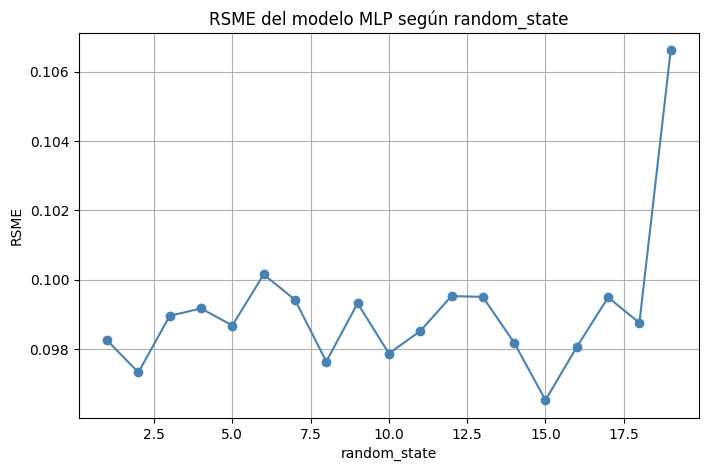

In [121]:
random_options = range(1,20)

tune_df = pd.DataFrame(index = random_options,
                       columns=['RSME'])
tune_df
n=len(y_tune)
for random_o in random_options:
    sales_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = False, alpha = 0.00005, random_state=random_o)
    sales_mlp.fit(X_train_s, y_train_s)
    y_tune_predict = sales_mlp.predict(X_tune)
    RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
    tune_df.at[random_o,'RSME'] = RSME
    print(f"random_state={random_o} → RSME={RSME:.4f}")
    

# Convertir la columna a float para graficar
tune_df['RSME'] = tune_df['RSME'].astype(float)

# Mostrar tabla de resultados
print("\nResultados del tuning:")
display(tune_df)

# Gráfico del RMSE por random_state
plt.figure(figsize=(8, 5))
plt.plot(tune_df.index, tune_df['RSME'], marker='o', linestyle='-', color='steelblue')
plt.title("RSME del modelo MLP según random_state")
plt.xlabel("random_state")
plt.ylabel("RSME")
plt.grid(True)
plt.show()



Elegimos el random_state = 8 ya que es el que menor valor tiene.

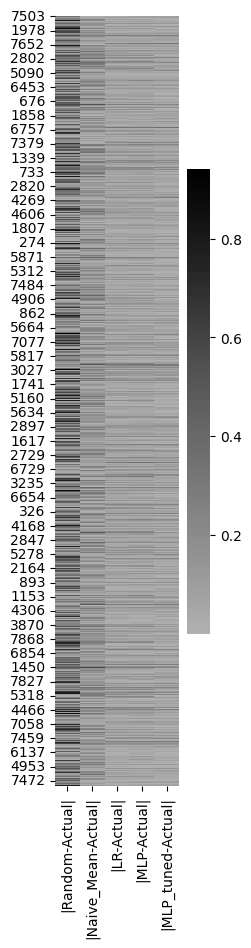

/var/folders/y7/m6l0m7cs4x74wr7kzyx5wjhh0000gn/T/ipykernel_23429/1338604233.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP,MLP_tuned
ME,-0.161369,-0.008048,-0.001882,-0.003792,-0.001139
RMSE,0.365411,0.168476,0.105117,0.107882,0.095413
MAE,0.298183,0.138735,0.083033,0.085281,0.072636
MAPE,inf,inf,inf,inf,inf


In [122]:
sales_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = False, alpha = 0.00005,random_state=15)

sales_mlp.fit(X_train_s, y_train_s)
result_df['MLP_tuned'] = sales_mlp.predict(X_test)
result_df['|MLP_tuned-Actual|'] = abs(result_df.MLP_tuned-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|','|MLP_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()
m='MLP_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

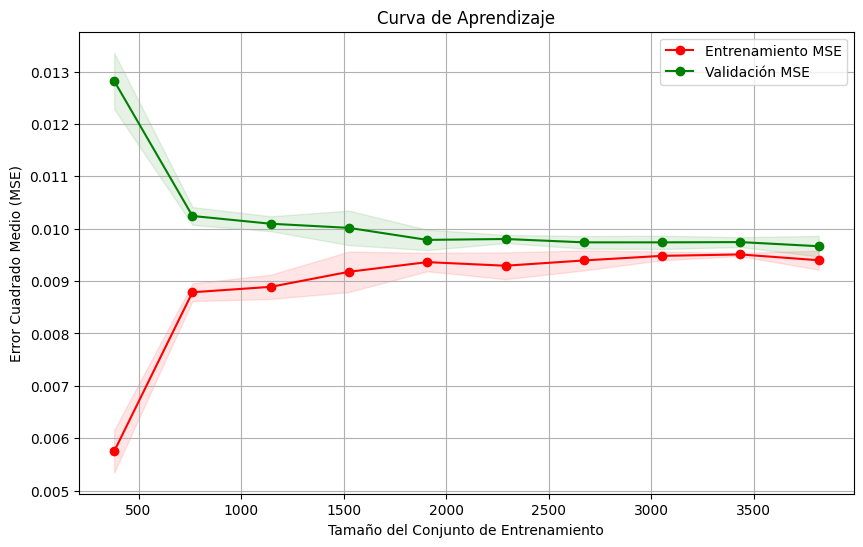

In [123]:
from sklearn.model_selection import learning_curve

# Define el modelo MLPRegressor (sales_mlp) y los datos (X_train_s, y_train_s)

# Define un rango de tamaños de conjunto de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)  # Puedes ajustar los valores según tus necesidades

# Calcula las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    sales_mlp, X_train_s, y_train_s, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Calcula los promedios y las desviaciones estándar de los puntajes
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Error Cuadrado Medio (MSE)")
plt.grid()

# Grafica las curvas de entrenamiento y validación
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Entrenamiento MSE")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Validación MSE")

plt.legend(loc="best")
plt.show()

Se ve claramente que el metodo evita tanto el underfitting como el overfitting.

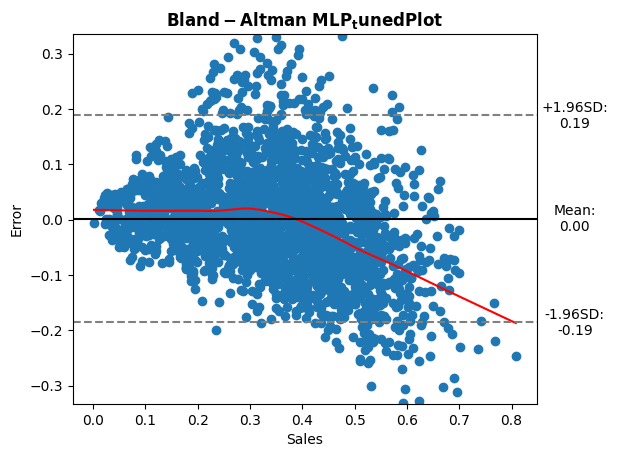

In [124]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    mean = np.mean([data1, data2], axis=0)
    diff = data1 - data2  # Difference between data1 and data2
    md = np.mean(diff)  # Mean of the difference
    sd = np.std(diff, axis=0)  # Standard deviation of the difference
    CI_low = md - 1.96 * sd
    CI_high = md + 1.96 * sd
    lowess = sm.nonparametric.lowess(diff, mean, frac=0.5)

    plt.scatter(mean, diff, *args, **kwargs)
    plt.plot(lowess[:, 0], lowess[:, 1], color='red')
    plt.axhline(md, color='black', linestyle='-')
    plt.axhline(md + 1.96 * sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96 * sd, color='gray', linestyle='--')
    return md, sd, mean, CI_low, CI_high


md, sd, mean, CI_low, CI_high = bland_altman_plot(result_df['MLP_tuned'], result_df.Actual)

plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{MLP_tuned Plot}$")
plt.xlabel("Sales")
plt.ylabel("Error")
plt.ylim(md - 3.5 * sd, md + 3.5 * sd)

BA_plot = np.min(mean) + (np.max(mean) - np.min(mean)) * 1.14

plt.text(BA_plot, md - 1.96 * sd,
         r'-1.96SD:' + "\n" + "%.2f" % CI_low,
         ha="center",
         va="center",
         )
plt.text(BA_plot, md + 1.96 * sd,
         r'+1.96SD:' + "\n" + "%.2f" % CI_high,
         ha="center",
         va="center",
         )
plt.text(BA_plot, md,
         r'Mean:' + "\n" + "%.2f" % md,
         ha="center",
         va="center",
         )
plt.subplots_adjust(right=0.85)

plt.show()

El Bland-Altman Plot muestra que para las ventas bajas, el modelo predice correctamente, segun lo esperado. Pero a medida que las ventas aumentan, el modelo tiende a predecir ventas mas bajas.

Esto puede deberse a que los datos con los que fue entrenado el modelo fueron en su gran mayoria valores de ventas bajos. Es decir, generalmente el modelo tiende a predecir valores bajos, porque eso es a lo que esta acostumbrado.

Para ventas bajas el modelo da resultados aceptables. Para ventas mas altas podriamos esperar mejorar el modelo o captar mas datos para reentrenar el modelo con mejores datos.

## Decision Tree

In [125]:
sales_dt = DecisionTreeRegressor()
sales_dt.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


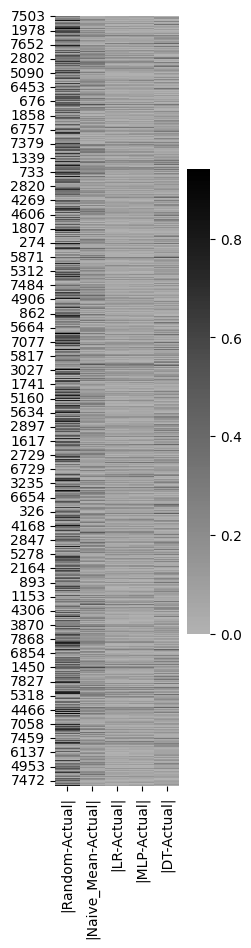

In [126]:
result_df['DT'] = sales_dt.predict(X_test)
result_df['|DT-Actual|'] = abs(result_df.DT-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|','|DT-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()


In [127]:
m='DT'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

/var/folders/y7/m6l0m7cs4x74wr7kzyx5wjhh0000gn/T/ipykernel_23429/3381090092.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP,MLP_tuned,DT
ME,-0.161369,-0.008048,-0.001882,-0.003792,-0.001139,-0.005991
RMSE,0.365411,0.168476,0.105117,0.107882,0.095413,0.140401
MAE,0.298183,0.138735,0.083033,0.085281,0.072636,0.108106
MAPE,inf,inf,inf,inf,inf,inf


Optimizamos los hiperparametros para el decision tree y obtener un modelo tuneado

In [128]:
param_grid = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth': [60, 70, 80, 90],
    'min_samples_split': [5, 10, 20, 30, 40],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  -0.010058200018524057
Initial parameters:  {'criterion': 'absolute_error', 'max_depth': 60, 'min_impurity_decrease': 0.0005, 'min_samples_split': 30, 'splitter': 'best'}


In [130]:
param_grid = {
    'criterion':['absolute_error'],
    'splitter' : ['best'],
    'max_depth': [56,57,58,59,60,61,62,63,64],
    'min_samples_split': [25,27,29,30,33,35,37],
    'min_impurity_decrease': [0.0005],
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  -0.010058200018524057
Initial parameters:  {'criterion': 'absolute_error', 'max_depth': 56, 'min_impurity_decrease': 0.0005, 'min_samples_split': 25, 'splitter': 'best'}


In [131]:
sales_dt = DecisionTreeRegressor(criterion='absolute_error', splitter='best', max_depth=56,
                           min_samples_split = 25, min_impurity_decrease = 0.005)
sales_dt.fit(X_train, y_train)

,criterion,'absolute_error'
,splitter,'best'
,max_depth,56
,min_samples_split,25
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.005
,ccp_alpha,0.0


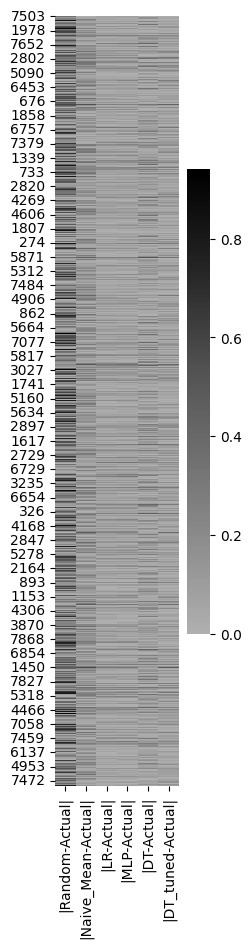

In [132]:
result_df['DT_tuned'] = sales_dt.predict(X_test)
result_df['|DT_tuned-Actual|'] = abs(result_df.DT_tuned-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|',
                   '|DT-Actual|','|DT_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [133]:
m='DT_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

/var/folders/y7/m6l0m7cs4x74wr7kzyx5wjhh0000gn/T/ipykernel_23429/2979402268.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP,MLP_tuned,DT,DT_tuned
ME,-0.161369,-0.008048,-0.001882,-0.003792,-0.001139,-0.005991,0.000769
RMSE,0.365411,0.168476,0.105117,0.107882,0.095413,0.140401,0.111332
MAE,0.298183,0.138735,0.083033,0.085281,0.072636,0.108106,0.085110
MAPE,inf,inf,inf,inf,inf,inf,inf


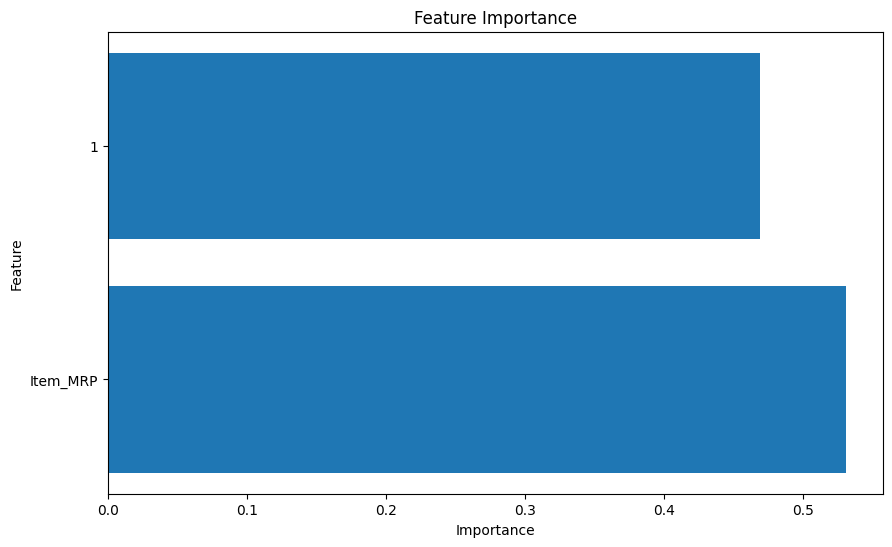

In [134]:
# Obtén la importancia de las características desde el modelo
feature_importance = sales_dt.feature_importances_

# Obtiene los nombres de las características o variables originales
feature_names = X_train.columns  # Asegúrate de que X_train sea un DataFrame de pandas

# Crea un DataFrame para visualizar las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0]

# Ordena las características por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Grafica las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Como vemos, las unicas dos variables que explican las decisiones tomadas por el arbol de decisiones son `Item_MRP` y la primer columna a la que se le hizo el OneHotEncoding.

Es curioso que el modelo no tome ninguna otra variable en consideracion para llegar a un resultado.

## SVM

In [135]:
from sklearn.svm import SVR

In [136]:
sales_svm = SVR(kernel='linear',
            C=1, epsilon=0.1)

sales_svm.fit(X_train, y_train)

prediction = sales_svm.predict(X_train)

In [137]:
sales_svm = SVR(kernel='linear', C=1, epsilon=0.1)

# Realizar validación cruzada
scores = cross_val_score(sales_svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

sales_svm.fit(X_train, y_train)

rmse_scores = np.sqrt(-scores)

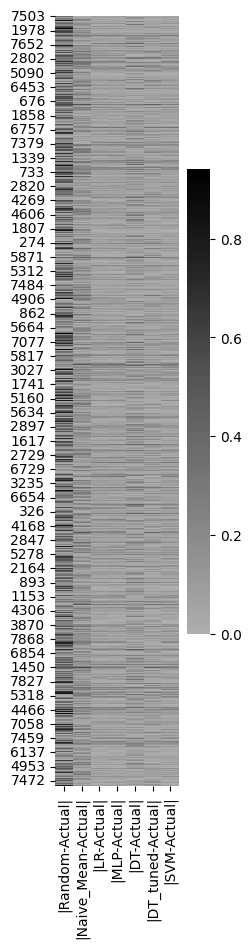

In [138]:
result_df['SVM'] = sales_svm.predict(X_test)
result_df['|SVM-Actual|'] = abs(result_df.SVM-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|',
                   '|DT-Actual|','|DT_tuned-Actual|', '|SVM-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [139]:
m='SVM'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

/var/folders/y7/m6l0m7cs4x74wr7kzyx5wjhh0000gn/T/ipykernel_23429/803104247.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP,MLP_tuned,DT,DT_tuned,SVM
ME,-0.161369,-0.008048,-0.001882,-0.003792,-0.001139,-0.005991,0.000769,-0.003778
RMSE,0.365411,0.168476,0.105117,0.107882,0.095413,0.140401,0.111332,0.105199
MAE,0.298183,0.138735,0.083033,0.085281,0.072636,0.108106,0.085110,0.083105
MAPE,inf,inf,inf,inf,inf,inf,inf,inf


# Analisis comparativos de modelos y conclusiones finales

En la tabla se presentan las métricas de error obtenidas por los distintos modelos evaluados:  
- **ME (Mean Error)**: mide el sesgo promedio del modelo (idealmente cercano a 0).  
- **RMSE (Root Mean Squared Error)**: penaliza más los errores grandes.  
- **MAE (Mean Absolute Error)**: mide el error promedio absoluto, sin distinguir el signo.  
- **MAPE (Mean Absolute Percentage Error)**: no se interpreta en este caso porque existen valores de ventas iguales a 0, lo que genera divisiones por cero (∞). Analizar esto en futuras iteraciones para mejorar los resultados obtenidos.

**Interpretación cuantitativa:**
- El modelo **MLP_tuned** obtiene los valores más bajos de **RMSE (0.095)** y **MAE (0.072)**, esto indica que logra el mejor desempeño general.  
- El modelo **LR (Regresión Lineal)** y el **SVM** también presentan resultados competitivos, con errores apenas mayores.  
- Los modelos **Decision Tree (DT)** y **DT_tuned** muestran un desempeño aceptable, pero con algo más de error y mayor varianza.  
- Los modelos base (**Random** y **Naive Mean**) sirven como referencia: su alto error confirma la necesidad de un modelo predictivo más complejo. 
- En todos los casos, el **ME** es cercano a 0, lo que indica que los modelos de hacen overfitting ni tampoco underfitting.

**Interpretación contextual del problema:**
El problema original buscaba predecir las ventas  de distintos locales. Teniendo en cuenta este contexto uno de los puntos mas importantes es que el modelo tenga, por un lado, un error de promedio **bajo** y, por otro, que evite errores **extremos**. Errores de este tipo podrian significar que los locales se queden sin stock o bien tengan un exceso del mismo, generando perdidas significativas.
Por lo tanto, podemos concluir que el modelo **MLP_tuned**, es el que se posiciona como el mas indicado.